TODO :
- Check hyperlinks in the table of contents 


DONE : 
- Define categorical variables as categorical 
- Remove scatterplots (?) 
- Separate Group 6 into 2 groups 
- Binarize MRS
- Remove BMI outliers 
- Change plot sizes and plot multiple plots in a grid for each feature group 
- Perform MRMR for feature selection

- Rerun EDA for binarized MRS
- Volumetric plots for 6 different groups (analyze) -discuss the plots
- Add bar plots instead of scutter plots
- Add comments from plots observations 
- First do train-test split, then feature selection with mrmr on the training set 
- Define selected features as Group 0, Group 1 and Group 6 
- Logistic regression (train with grid search for hyperparameters and evaluate)


@Alihan26 

- SVM training and evaluation 
- Double check my interpretations in the comments and observations after plots 
- [TO-DO] What's the most common location of the lesion?
Look at those locations, and find out which of them had bigger problems, so that 
we can predict the severity of the lesion based on the location of the lesion.

@jul-des 

- RandomForest training and evaluation 
- Where can we find metadata, which column describes what ? Please add/double check metadata (for example etiology values)
- Double check my interpretations in the comments and observations after plots 
- Validate final feature selection : maybe remove some features still 

# 🧠 Data Science Project: Ischemic Stroke Outcome Prediction

## Table of Contents

1. [Introduction](#introduction)
2. [Dataset Description](#dataset-description)
3. [Library Imports](#library-imports)
4. [Load the Data](#load-the-data)
5. [Data Cleaning & Preprocessing](#data-cleaning--preprocessing)
    - Handling missing values
    - Filtering stroke patients
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - 6.1 [Clinical Features](#clinical-features)
        - Barplots
        - Histograms
        - Correlation matrix
    - 6.2 [Volumetric Features](#volumetric-features)
        - Histograms
        - Scatterplots
        - Correlation matrix
    
7. [Feature Selection](#feature-selection)
    - Applying MRMR (Maximum Relevance Minimum Redundancy)
    - Selected features summary
8. [Preparing Data for Machine Learning](#preparing-data-for-machine-learning)
    - Encoding target
    - Train-test split
9. [Model Training & Evaluation](#model-training--evaluation)
    - Logictic Regression
    - Random Forest
    - SVM
    - KNN(Optional)
    - XGBoost(Optional)
    - DecisionTree(Optional)
    - NeuralNetwork TabPFN (Optional)
10. [Results & Discussion](#results-&-discussion)
11. [References](#references)


## Introduction   

This project aims to **predict functional outcome post-ischemic stroke** using machine learning techniques based on:

- Demographic and clinical data
- Features extracted from MRI imaging

Functional outcome is measured by the **Modified Rankin Scale (mRS)** — a widely used clinical measure of post-stroke disability:

- Scale ranges from **0 (no symptoms)** to **6 (death)**
- Often binarized:  
  - **0–2** → Favorable outcome  
  - **3–6** → Unfavorable outcome  

Therefore, the prediction task can be framed as:
- **Binary classification** (favorable vs. unfavorable)
- Or **multiclass classification** (mRS scores 0–6)

### Significance

Stroke is a **leading cause of disability worldwide**. Accurate outcome prediction can:

- Improve **patient management and rehabilitation planning**
- Enhance **clinical decision-making**
- Help identify **key predictors** from large datasets

While traditional assessment relies on expert evaluation, machine learning can:
- Discover complex patterns in lesion imaging and clinical variables
- Provide scalable, data-driven outcome predictions

This project focuses on leveraging:
- **Lesion characteristics**
- **Patient demographics**
- **Stroke etiology**
  
To improve predictive models for stroke severity and recovery.


## Research Questions

1. **How well do clinical data and brain volumetry predict functional outcome post-ischemic stroke?**
2. **Which lesion characteristics and patient factors are most predictive of stroke severity and outcome?**
3. **Can machine learning models accurately predict stroke outcome and etiology based on extracted lesion features?**
4. **How do different machine learning models compare in terms of predictive performance and interpretability?**


## Dataset Description

The Stroke Outcome Optimization Project (SOOP) Dataset [1] consists of clinical and 
imaging data from 1,715 individuals, including 1,461 acute ischemic stroke cases. The 
dataset is sourced from Prisma Health-Upstate and the University of South Carolina. It 
includes demographic information (age, sex, race), stroke etiology, clinical scores (NIH 
Stroke Scale, modified Rankin Scale), and multiple MRI modalities (Diffusion-Weighted 
Imaging, T1, FLAIR, ADC). Additionally, manually segmented lesion maps and computed 
features such as lesion volume and vascular territory are available. This dataset provides 
a valuable resource for machine learning-based stroke outcome and etiology prediction. 


### Feature Descriptions for Stroke Outcome Dataset

This table describes all the columns in the dataset used for ischemic stroke outcome prediction. It includes clinical, anatomical, and volumetric lesion information. Data has been normalized (mean = 0, std = 1).

| **Column Name** | **Description** |
|-----------------|-----------------|
| `ID` | Patient identifier |
| `Total volume (direct)` | Total volume of ischemic lesion in mm³ (normalized) |
| `Number of lesions` | Count of separate ischemic lesions in the brain |
| `Main Side` | Dominant side of lesion location (left/right) |
| `ACAright`, `MCAright`, `PCAright`, `Pons/Medullaright`, `Cerebellumright`, `ACAleft`, `MCAleft`, `PCAleft`, `Pons/Medullaleft`, `Cerebellumleft` | Lesion volume in respective vascular territories |
| `Billateral` | Indicates if lesion affects both brain hemispheres |
| `Totalleft`, `Totalright` | Total lesion volume on left/right hemispheres |
| `Portion largest lesion` | Proportion of the largest lesion to total volume |
| `MNI Volume` | Lesion volume in MNI (standardized brain atlas) space |
| `X (lesions)` | Lesion volume in territory X (e.g., `ACAright (lesions)`) |
| `X (count)` | Number of lesions in territory X (e.g., `MCAleft (count)`) |
| `Total_right (lesion)`, `Total_left (lesion)` | Total lesion volume per side |
| `ratio_sides` | Ratio of right-to-left lesion volume |
| `Billateral (lesions)` | Volume of lesions affecting both hemispheres |
| `Total_anterior (lesion)` | Lesion volume in anterior circulation (ACA & MCA) |
| `Total_posterior (lesion)` | Lesion volume in posterior circulation (PCA, brainstem, cerebellum) |
| `ratio_ant_post` | Ratio of anterior to posterior lesion volumes |
| `ant_and_post_lesions` | Indicator if lesions are present in both anterior and posterior regions |
| `Portion X` | Proportion of lesion volume in vascular territory X (e.g. `Portion MCAleft`) |
| `sex` | Patient's biological sex |
| `age` | Patient's age |
| `acuteischaemicstroke` | 1 = patient had an acute ischemic stroke; 0 = no stroke |
| `priorstroke` | History of previous stroke |
| `bmi` | Body Mass Index |
| `nihss` | NIH Stroke Scale (0 = no deficit, 42 = severe stroke) |
| `gs_rankin_6isdeath` | Modified Rankin Score (0 = no symptoms, 6 = death) |
| `etiology` | Stroke etiology (cause), categorical (1–5) |
| `3rd-ventricle`, `4th-ventricle` | Volumes of brain ventricles |
| `brainstem`, `extracerebral_CSF` | Volumes of anatomical structures |
| `WMH` | White Matter Hyperintensities – important predictor of outcome |
| `summ-white-matter`, `summ-cortex`, `summ-lateral-ventricle`, `summ-cerebellum-white-matter`, `summ-cerebellum-cortex`, `summ-thalamus`, `summ-caudate`, `summ-putamen`, `summ-pallidum`, `summ-hippocampus`, `summ-amygdala`, `summ-accumbens`, `summ-ventral-DC` | Summed volumes of bilateral anatomical brain regions |

---

**Note:**  
- Lesion volumes are extracted from manually segmented MRI data.
- All features are standardized. 


## Library Imports

In [49]:
# Imports
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pip install numpy
%pip install seaborn
#!pip install --upgrade --force-reinstall scikit-learn

# Core Libraries
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.pylab import rcParams

# Set a global plot size
rcParams['figure.figsize'] = 18, 5

# Scikit-learn: Preprocessing, Models, Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/Users/alihankaratasli/Desktop/FS25/Data_Science/Project_Github/DataScience


## Load the Data

In [50]:
# Replace 'data_clinical.csv' with the actual CSV filename if it differs.
data = pd.read_csv("data/processed/complete_per_patient_t1_volumetry.csv")

# Preview the data and list all column names
print("Data Preview:")
print(data.head())
print("\nAll Columns in the Dataset:")
print(data.columns.tolist())
print('Number of patients in the original dataset:', len(data))

Data Preview:
      ID  Total volume (direct)  Number of lesions  Main Side  ACAright  \
0  sub-2               0.880707           0.132130          1    10.424   
1  sub-3               2.184380           0.017070          0     0.400   
2  sub-5              -0.571408          -0.558231          1     0.035   
3  sub-8               0.824821           0.477311          1    55.660   
4  sub-9               0.021404          -0.443171          0     0.000   

   MCAright  PCAright  Pons/Medullaright  Cerebellumright  ACAleft  ...  \
0    75.990    21.287                0.0            0.000    3.280  ...   
1     0.557     0.000                0.0            7.167   24.304  ...   
2     1.120     0.000                0.0            0.000    0.000  ...   
3    32.249     0.319                0.0            0.000    8.454  ...   
4     0.000     0.000                0.0            0.000    2.533  ...   

   summ-cerebellum-white-matter  summ-cerebellum-cortex  summ-thalamus  \
0         

## Data Cleaning & Preprocessing

In [51]:
# Binarize the target variable
data['gs_rankin_6isdeath'] = data['gs_rankin_6isdeath'].apply(lambda x: 1 if x >=3 else 0)

# Define categorical columns
data['etiology'] = data['etiology'].astype('category')
data['priorstroke'] = data['priorstroke'].astype('category')
data['acuteischaemicstroke'] = data['acuteischaemicstroke'].astype('category')
data['gs_rankin_6isdeath'] = data['gs_rankin_6isdeath'].astype('category')

data['Billateral'] = data['Billateral'].astype('category')
data['Billateral (lesions)'] = data['Billateral (lesions)'].astype('category')
data['ant_and_post_lesions'] = data['ant_and_post_lesions'].astype('category')
data['Main Side'] = data['Main Side'].astype('category')

# Convert'sex' values
sex_mapping = {
    0: 'male',
    1: 'female',
    'M': 'male',
    'F': 'female'
}
data['sex'] = data['sex'].replace(sex_mapping)
# Save as categorical
data['sex'] = data['sex'].astype('category')

# Filter outliers or invalid ranges
valid_age_mask = (data['age'] >= 0) & (data['age'] <= 120)
valid_bmi_mask = (data['bmi'] >= 10) & (data['bmi'] <= 30)
valid_nihss_mask = (data['nihss'] >= 0) & (data['nihss'] <= 42)

combined_mask = valid_age_mask & valid_bmi_mask & valid_nihss_mask

# Apply the combined mask to filter the data
before_filter_shape = data.shape
data = data[combined_mask]
print(f"Removed {before_filter_shape[0] - data.shape[0]} rows due to out-of-range values.")


# Define clinical features
clinical_features = ['sex', 'age', 'bmi', 'nihss', 'gs_rankin_6isdeath', 'acuteischaemicstroke','priorstroke','etiology']
data_clinical = data[clinical_features]

# Remove duplicate rows, if any
initial_shape = data.shape
data.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_shape[0] - data.shape[0]} duplicate rows.")


# Define volumetric features ( the rest -ID column)
volumetric_features = [col for col in data.columns if col not in clinical_features and col != 'ID']
data_volumetric = data[volumetric_features]
data.dropna(subset=volumetric_features, inplace=True)
print(f"Removed {initial_shape[0] - data.shape[0]} rows due to missing values in volumetric features.")

# Drop rows with missing values in columns of interest (example approach)
before_dropna_shape = data.shape
data.dropna(subset=clinical_features, inplace=True)
print(f"Removed {before_dropna_shape[0] - data.shape[0]} rows due to missing values in columns of interest.")


print("\nCleaned Data Subset Preview:")
print(data_clinical.head())
print("\nSummary of Cleaned Data Subset:")
print(data_clinical.describe())
print("Number of patients in cleaned data:", len(data_clinical))



Removed 346 rows due to out-of-range values.

Removed 0 duplicate rows.
Removed 0 rows due to missing values in volumetric features.
Removed 0 rows due to missing values in columns of interest.

Cleaned Data Subset Preview:
      sex  age    bmi  nihss gs_rankin_6isdeath acuteischaemicstroke  \
0  female   78  22.84   17.0                  0                  1.0   
1    male   87  19.23   15.0                  1                  1.0   
3    male   34  23.14   19.0                  0                  1.0   
4    male   70  26.89   18.0                  1                  1.0   
6    male   70  26.56    0.0                  0                  1.0   

  priorstroke etiology  
0         0.0        2  
1         1.0        5  
3         0.0        5  
4         0.0        1  
6         0.0        1  

Summary of Cleaned Data Subset:
              age         bmi       nihss
count  537.000000  537.000000  537.000000
mean    66.852886   24.513966    8.897579
std     14.195029    3.609660    8

## Exploratory Data Analysis (EDA)

### Clinical Features

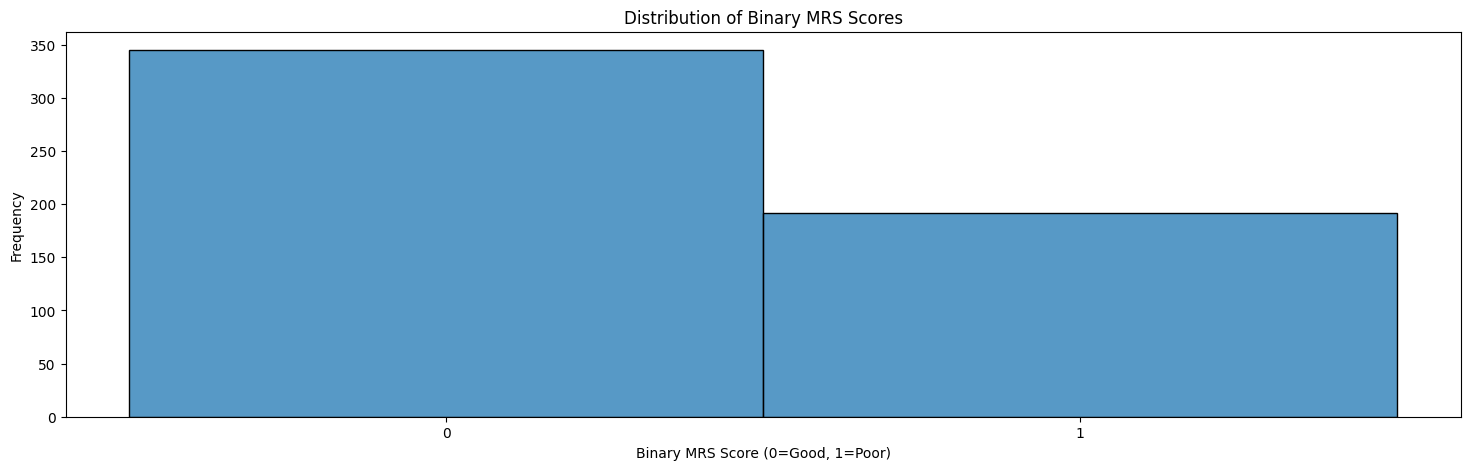

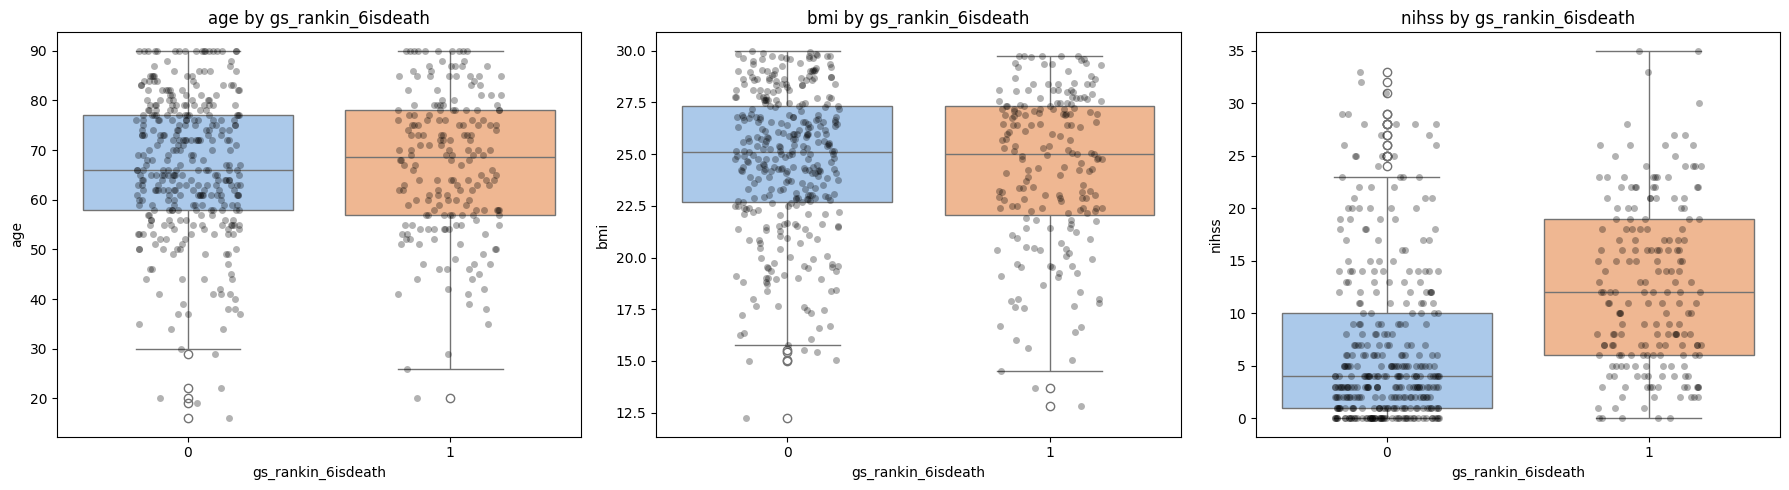

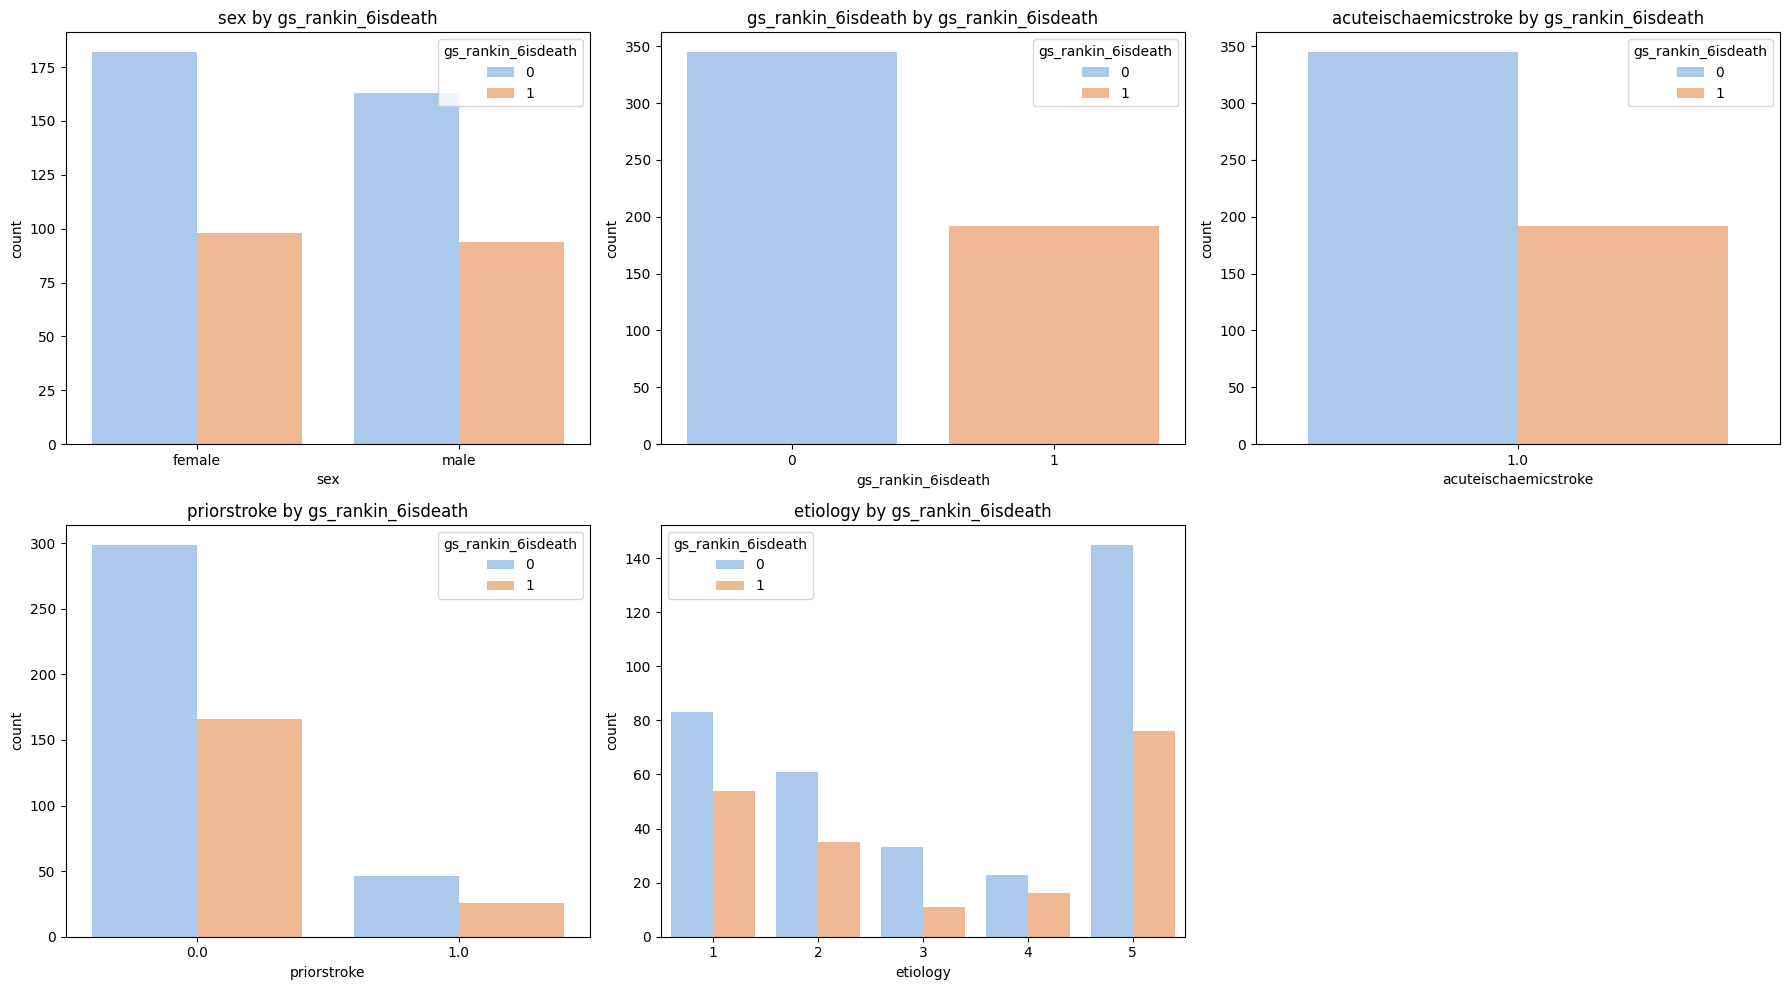

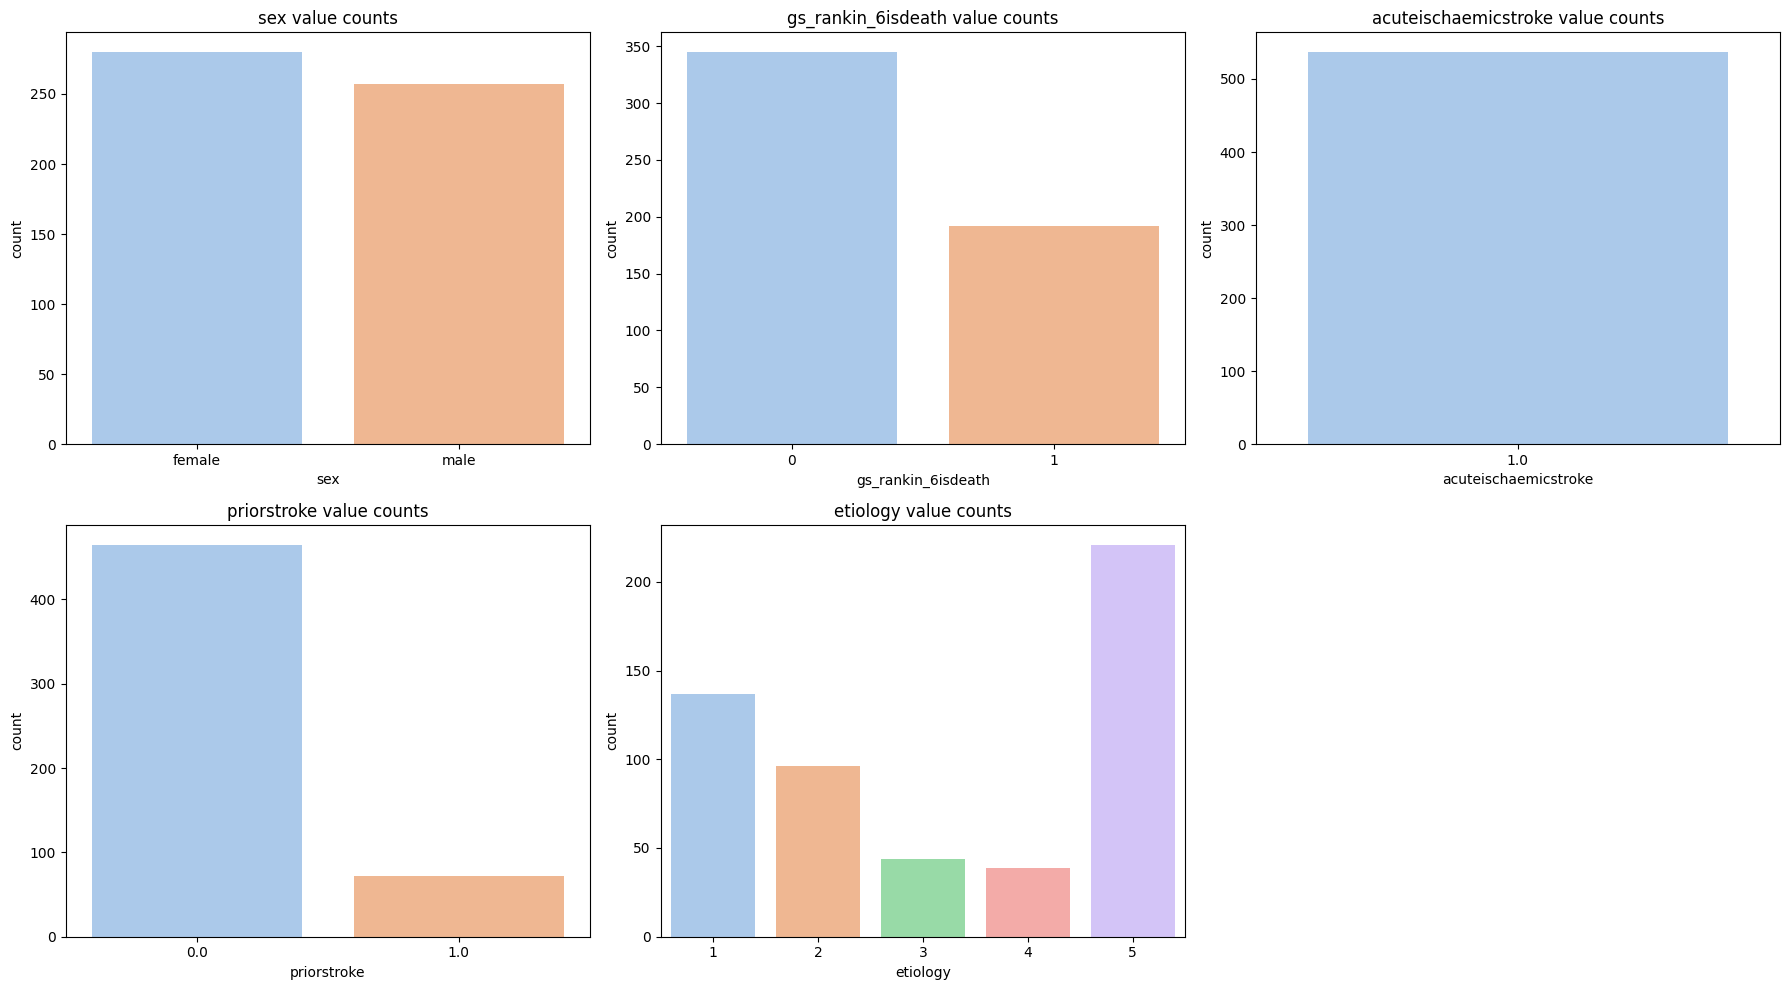

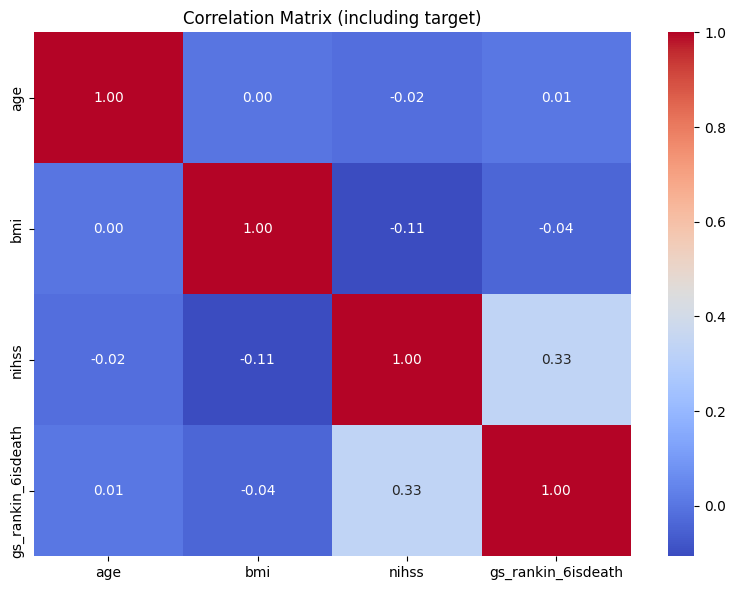

In [52]:
# Plot the target variable histogram 

sns.histplot(data['gs_rankin_6isdeath'], bins=2, discrete=True)
plt.xticks([0, 1])  # Set x-axis ticks to only 0 and 1
plt.xlabel('Binary MRS Score (0=Good, 1=Poor)')
plt.ylabel('Frequency')
plt.title('Distribution of Binary MRS Scores')
plt.show()

def ensure_axes_list(axes):
    """
    Safely convert axes object from plt.subplots() into a flat list of Axes.
    Handles single Axes, 1D array, or 2D grid.
    """
    if isinstance(axes, np.ndarray):
        return axes.flatten().tolist()
    else:
        return [axes]


def plot_features_vs_target(data, features, target, plots_per_row=3):
    """
    Visualizes how selected features relate to a binary target variable.
    - Numeric features: Boxplots + Stripplots
    - Categorical features: Countplots by target + Value count histograms
    - Also includes correlation heatmap for numeric features
    """

    def ensure_axes_list(axes):
        """
        Safely convert axes object from plt.subplots() into a flat list of Axes.
        Handles single Axes, 1D array, or 2D grid.
        """
        if isinstance(axes, np.ndarray):
            return axes.flatten().tolist()
        else:
            return [axes]

    numeric_feats = []
    categorical_feats = []

    for feature in features:
        if feature not in data.columns:
            print(f"⚠️ Warning: Feature '{feature}' not found in dataset.")
            continue
        if pd.api.types.is_numeric_dtype(data[feature]):
            numeric_feats.append(feature)
        else:
            categorical_feats.append(feature)

    # === NUMERIC FEATURES vs TARGET (box + strip plot) ===
    if numeric_feats:
        n = len(numeric_feats)
        rows = math.ceil(n / plots_per_row)
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = ensure_axes_list(axes)

        for i, feature in enumerate(numeric_feats):
            if i >= len(axes):
                break
            sns.boxplot(x=target, y=feature, data=data, ax=axes[i], palette='pastel')
            sns.stripplot(x=target, y=feature, data=data, ax=axes[i], color='black', alpha=0.3, jitter=0.2)
            axes[i].set_title(f'{feature} by {target}')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    # === CATEGORICAL FEATURES vs TARGET ===
    if categorical_feats:
        n = len(categorical_feats)
        rows = math.ceil(n / plots_per_row)

        # Countplot by target
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = ensure_axes_list(axes)

        for i, feature in enumerate(categorical_feats):
            if i >= len(axes):
                break
            sns.countplot(x=feature, hue=target, data=data, ax=axes[i], palette='pastel')
            axes[i].set_title(f'{feature} by {target}')
            axes[i].legend(title=target)

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

        # Countplot: raw value counts (histogram)
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = ensure_axes_list(axes)

        for i, feature in enumerate(categorical_feats):
            if i >= len(axes):
                break
            sns.countplot(x=feature, data=data, ax=axes[i], palette='pastel')
            axes[i].set_title(f'{feature} value counts')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    # === Correlation Heatmap (Optional) ===
    if numeric_feats:
        try:
            target_as_numeric = data[target].astype(float)
            valid_numeric = [f for f in numeric_feats if pd.api.types.is_numeric_dtype(data[f])]
            corr_data = data[valid_numeric].copy()
            corr_data[target] = target_as_numeric

            corr_matrix = corr_data.corr()
            plt.figure(figsize=(8, 6))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Matrix (including target)')
            plt.tight_layout()
            plt.show()
        except ValueError:
            print(f"Could not convert target '{target}' to numeric for correlation heatmap.")

# Example usage:
plot_features_vs_target(data_clinical, clinical_features, target='gs_rankin_6isdeath', plots_per_row=3)

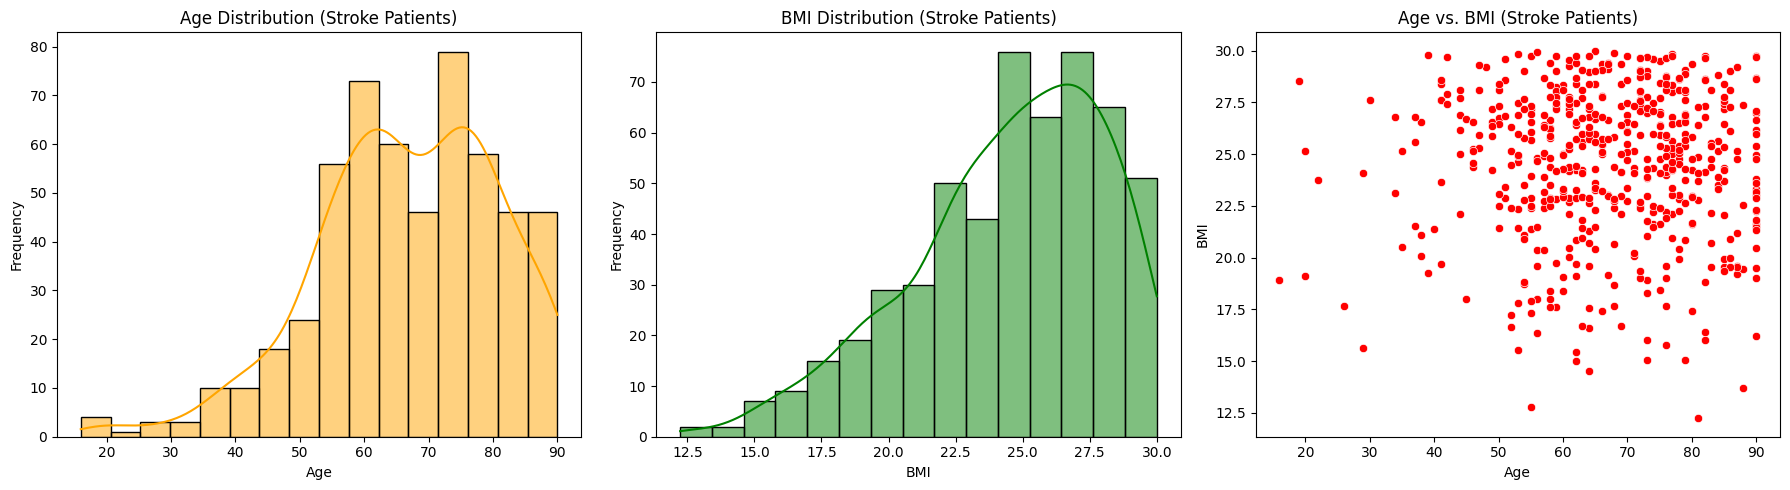

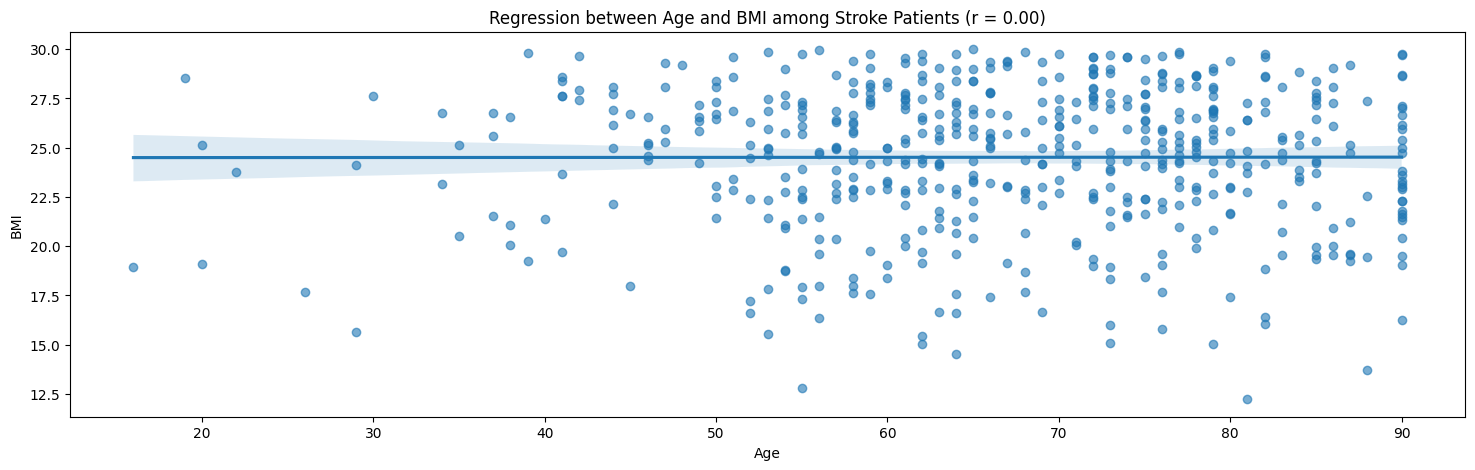

In [53]:
# Arrange the three plots in a 1x3 grid.
fig2, axs2 = plt.subplots(1, 3)

# 6.1 Age Distribution for Stroke Patients
sns.histplot(data_clinical['age'], kde=True, ax=axs2[0], color='orange')
axs2[0].set_title("Age Distribution (Stroke Patients)")
axs2[0].set_xlabel("Age")
axs2[0].set_ylabel("Frequency")

# BMI Distribution for Stroke Patients
sns.histplot(data_clinical['bmi'], kde=True, ax=axs2[1], color='green')
axs2[1].set_title("BMI Distribution (Stroke Patients)")
axs2[1].set_xlabel("BMI")
axs2[1].set_ylabel("Frequency")

# Combined Scatter: Age vs. BMI (Stroke Patients)
sns.scatterplot(x='age', y='bmi', data=data_clinical, ax=axs2[2], color='red')
axs2[2].set_title("Age vs. BMI (Stroke Patients)")
axs2[2].set_xlabel("Age")
axs2[2].set_ylabel("BMI")

plt.tight_layout()
plt.show()


# Regression between Age and BMI among Stroke Patients
# Compute the Pearson correlation coefficient between Age and BMI.
corr_val = data_clinical['age'].corr(data_clinical['bmi'])

# Create a plot with a regression line.
plt.figure()
sns.regplot(data=data_clinical, x='age', y='bmi', scatter_kws={'alpha': 0.6})
plt.title(f"Regression between Age and BMI among Stroke Patients (r = {corr_val:.2f})")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

# Comments and observations : 

- More than 300 patients from the cohort have favorable outcome, a bit less than 200 have an unfaverable outcome. 
- The age and the nihss are visibly higher in the "bad outcome" group, as expected. 
- Most patients didn't have a prior history of stroke. 
- Most cases of stroke have an unknown reason/origin of stroke.  
- There are more male patients in the cohort. 
- NIHSS seems to be most strongly correlated with the severity of the outcome among the clinical features. 
- The average age of the cohort is around 70 years old. 
- The average BMI score is around 26. 

### Volumetric Features


 Processing Group 1: Global Lesion Metrics...



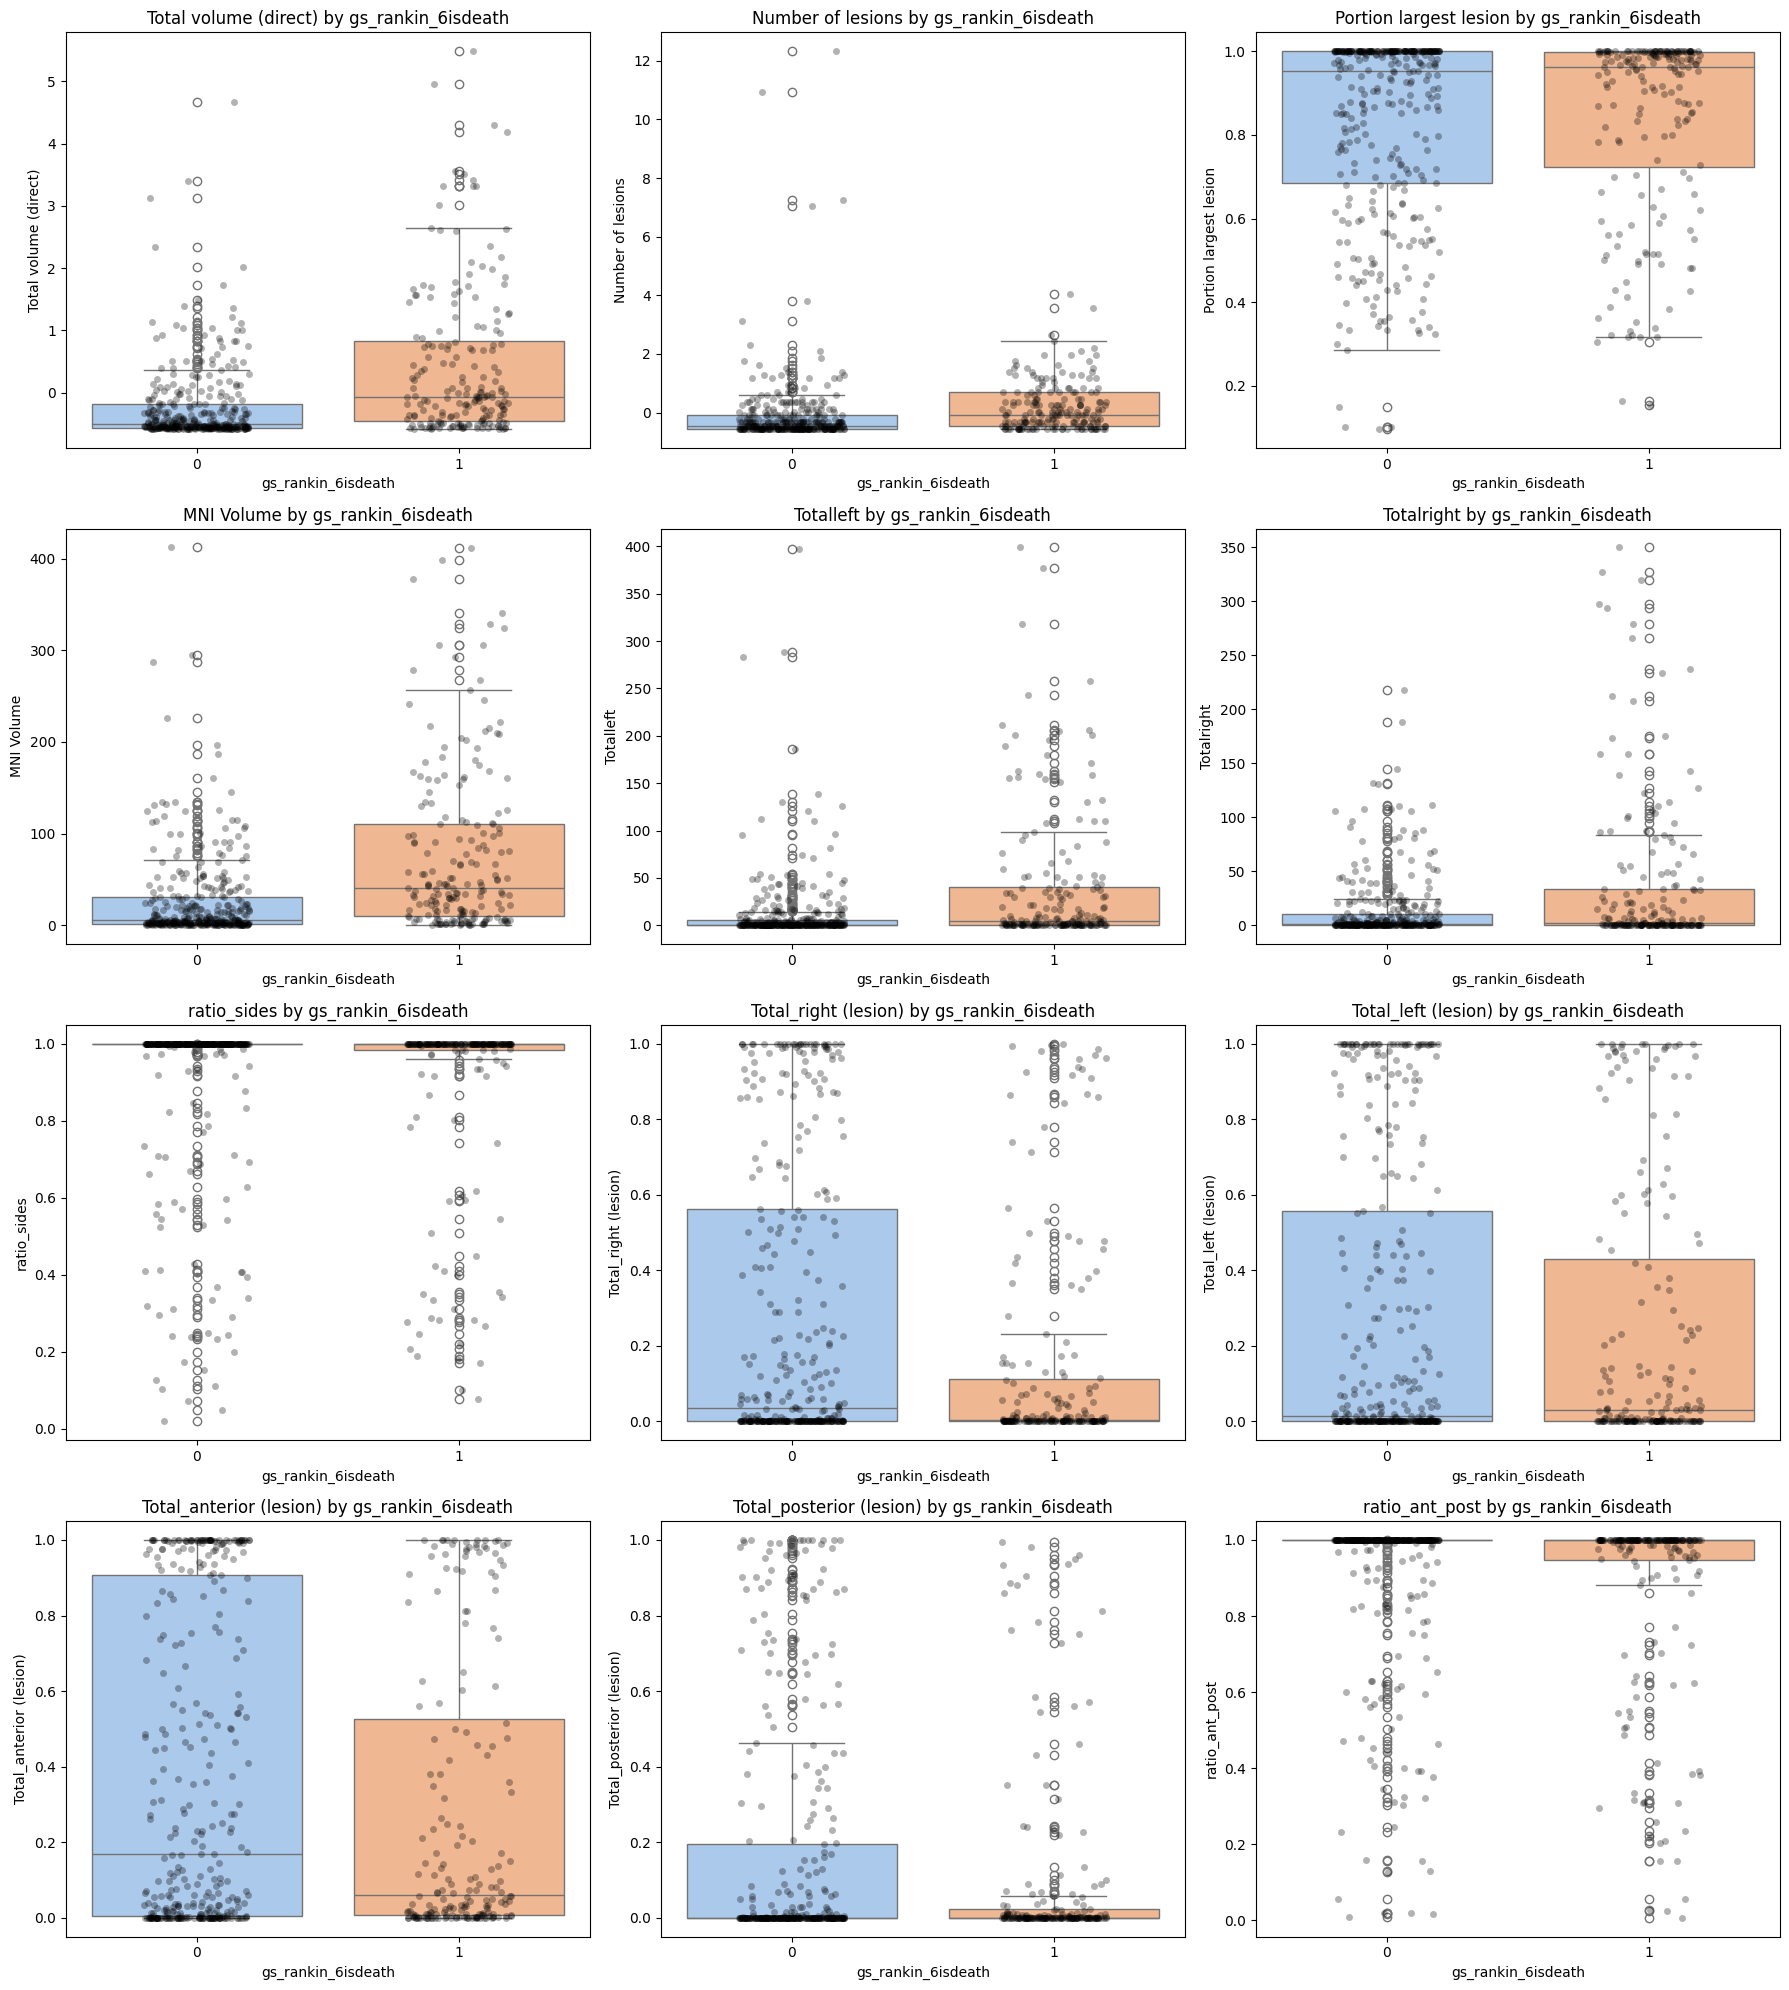

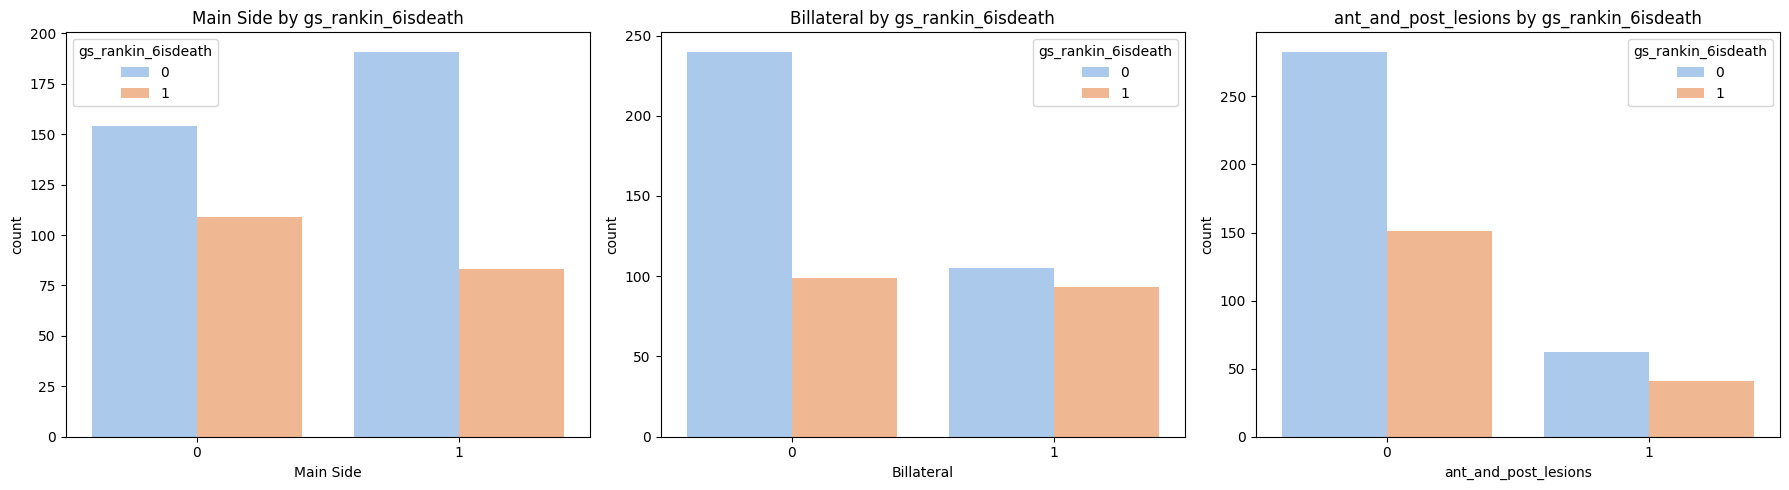

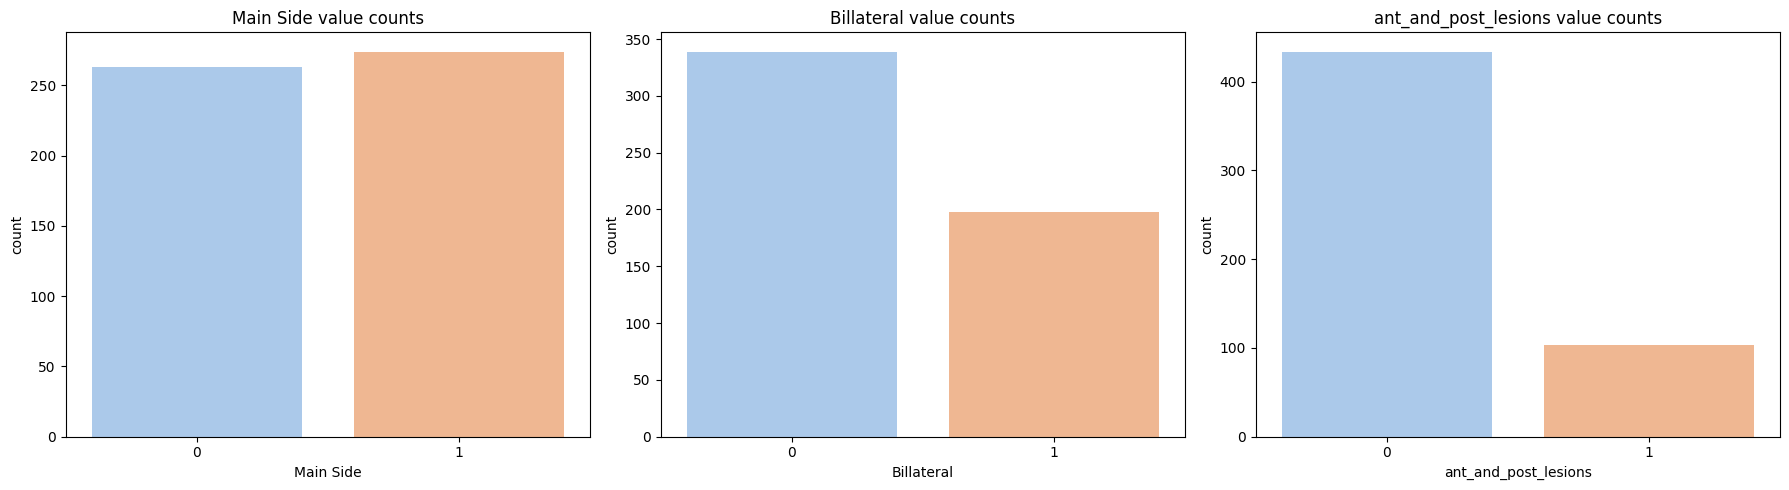

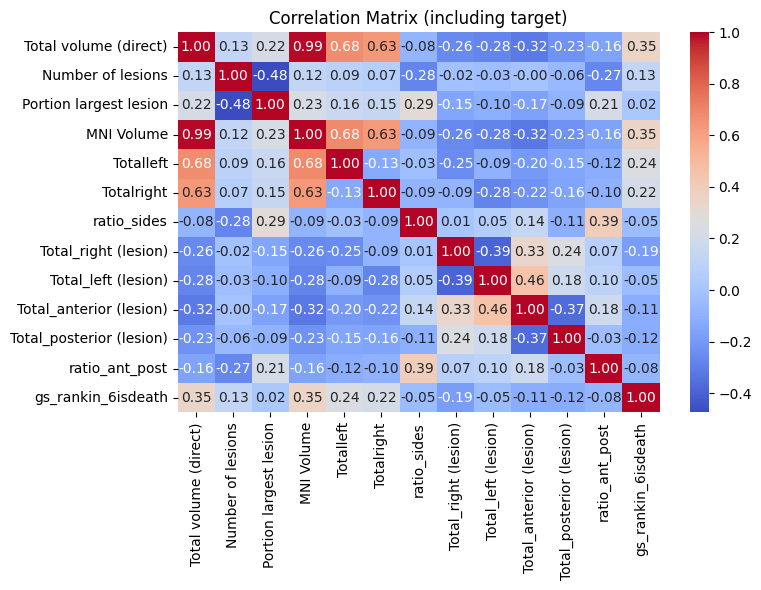


 Processing Group 2: Lesion Volumes by Vascular Territories...



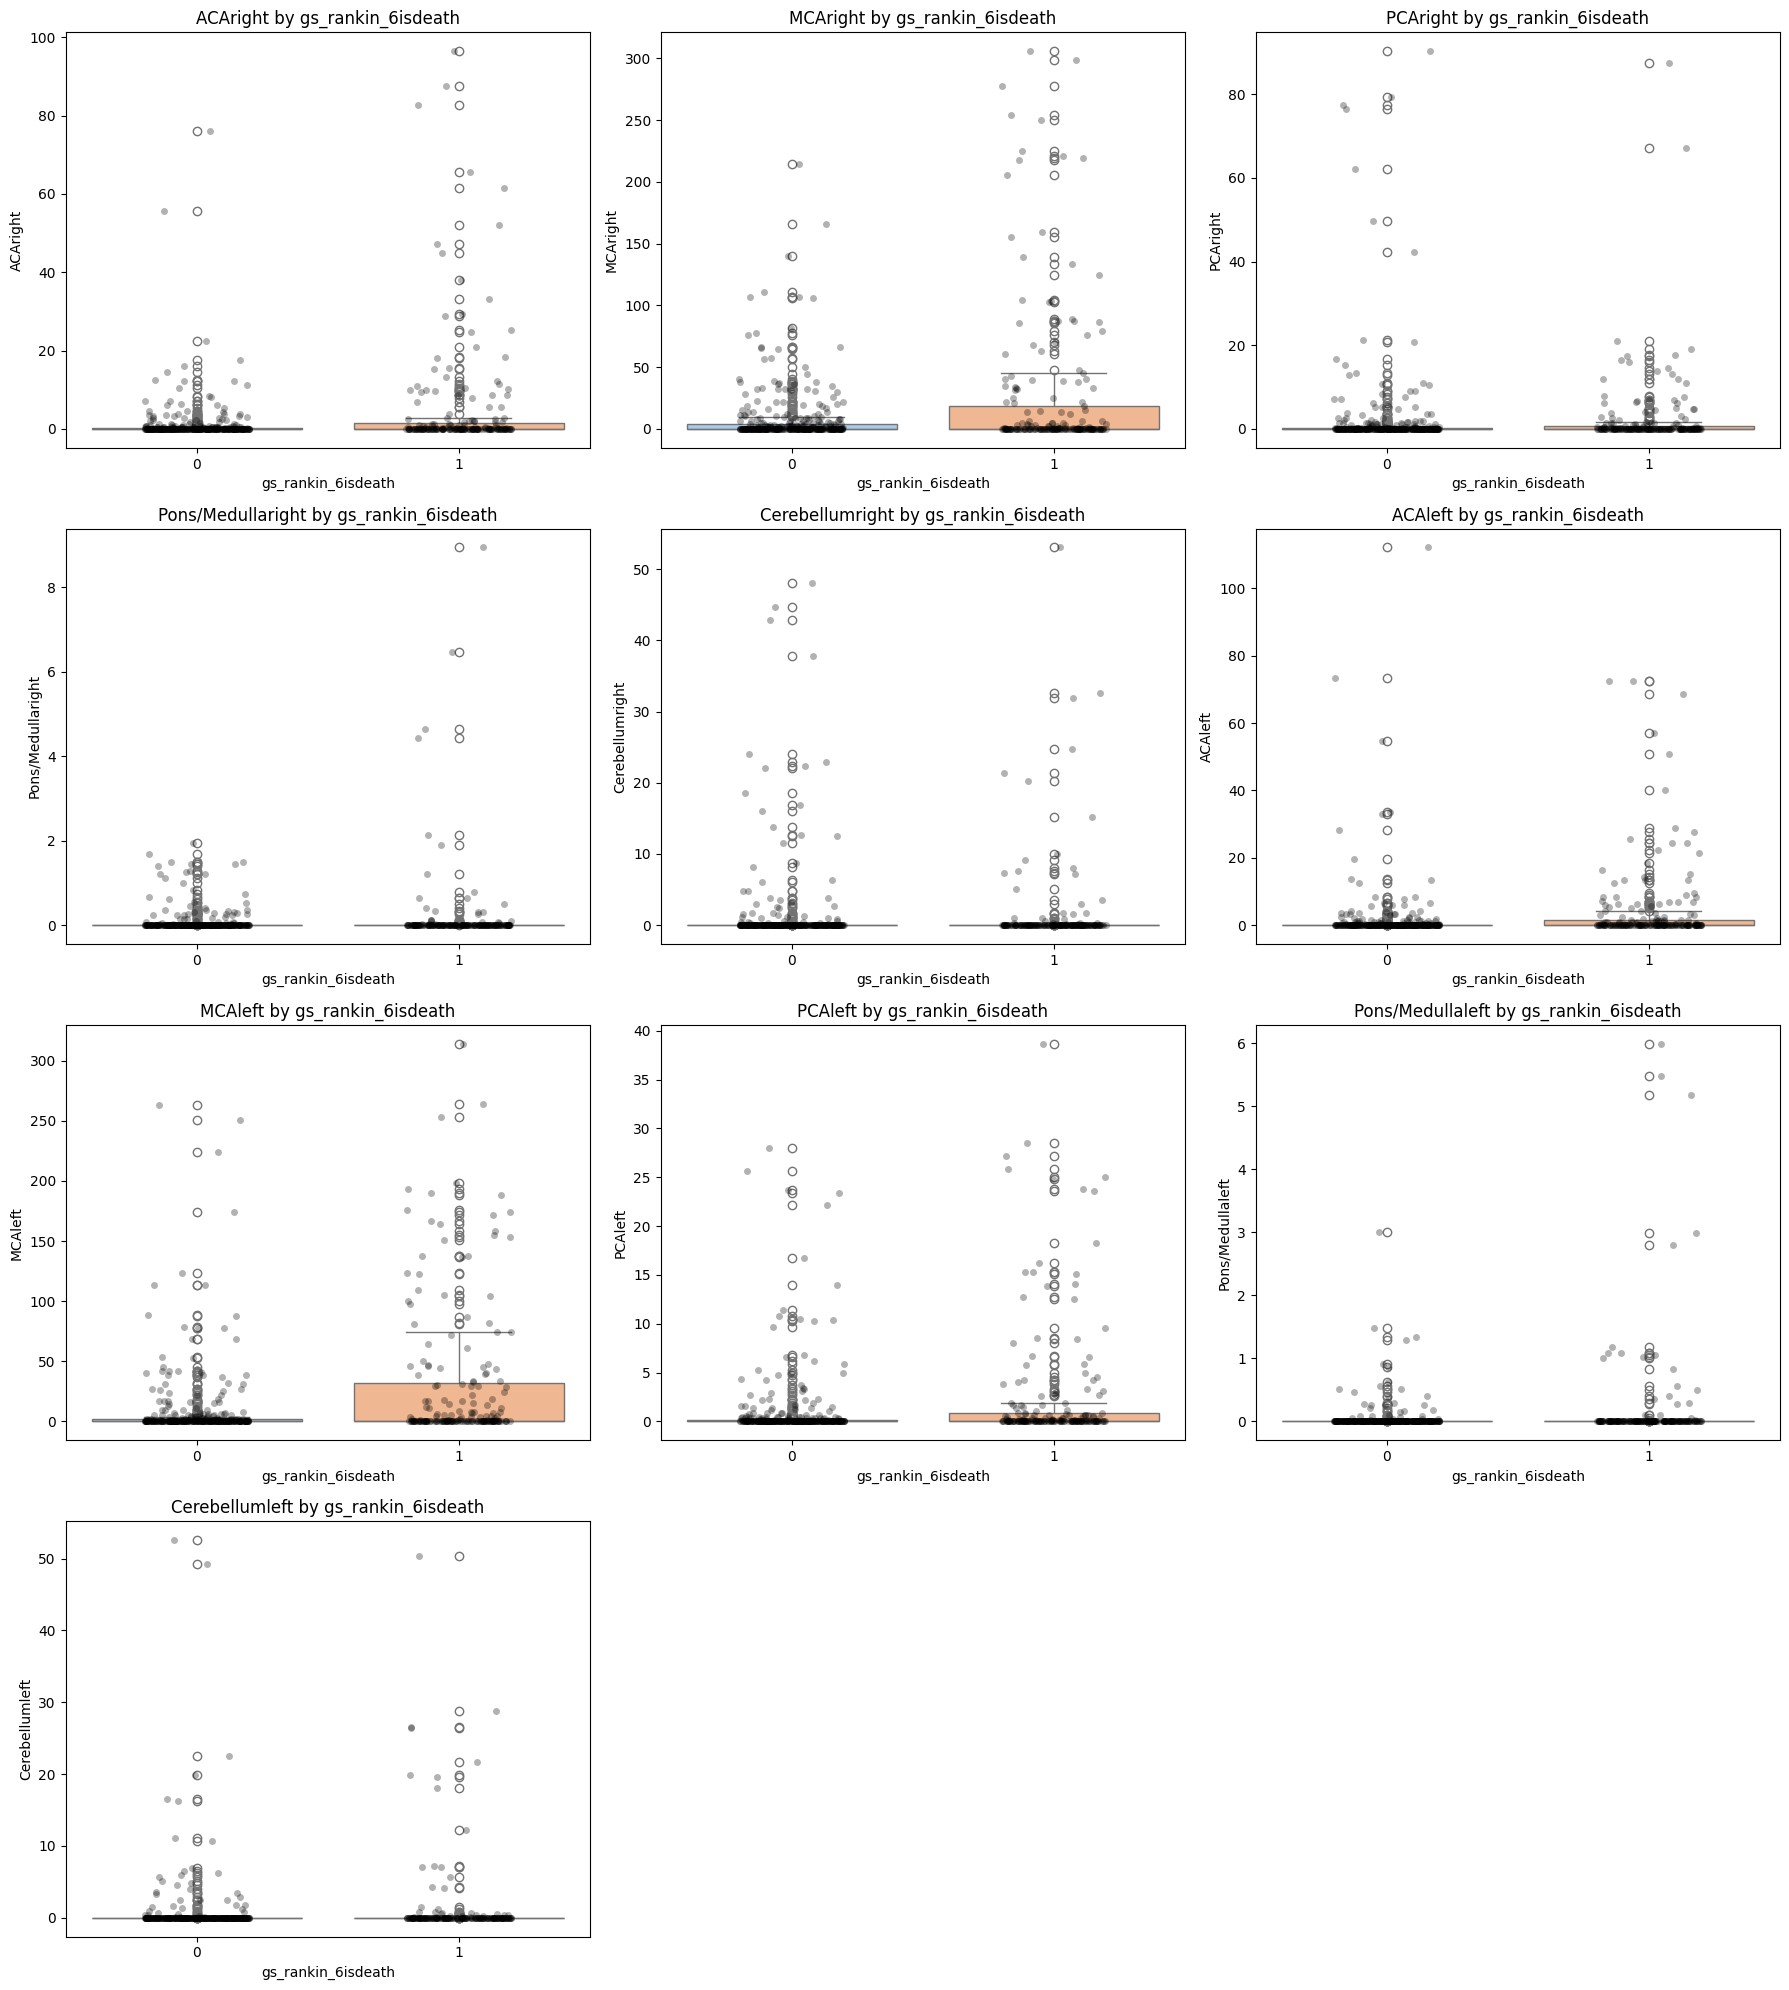

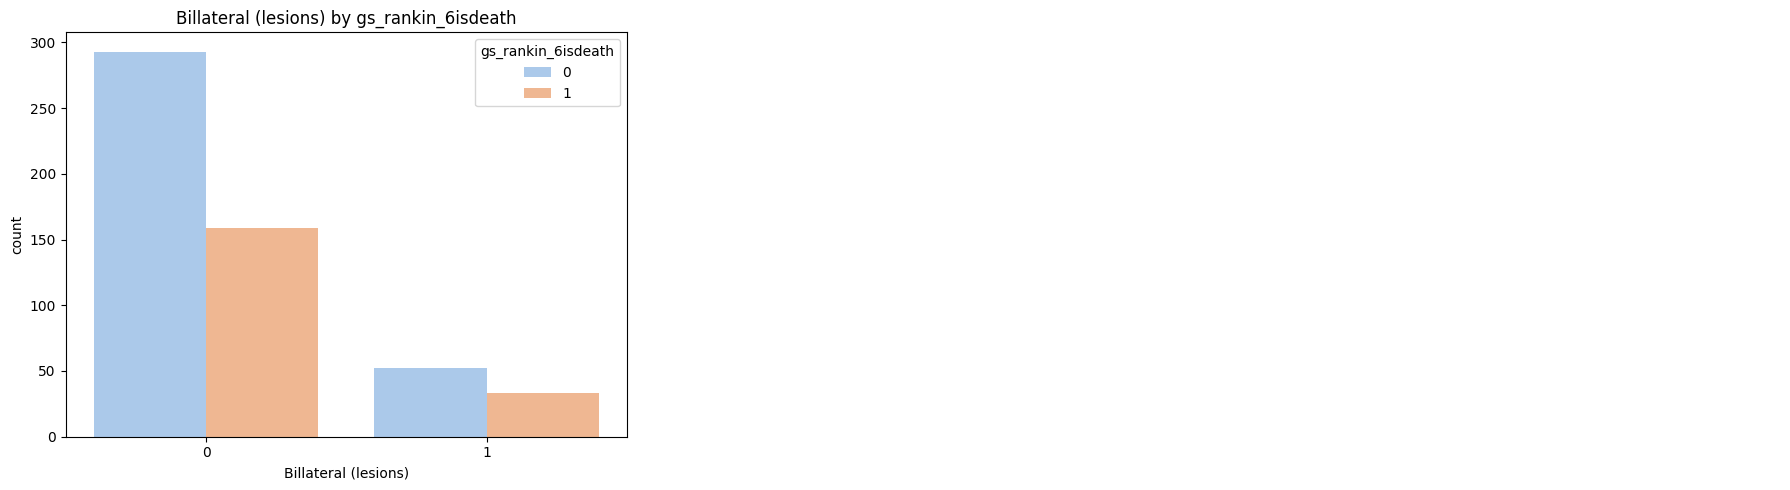

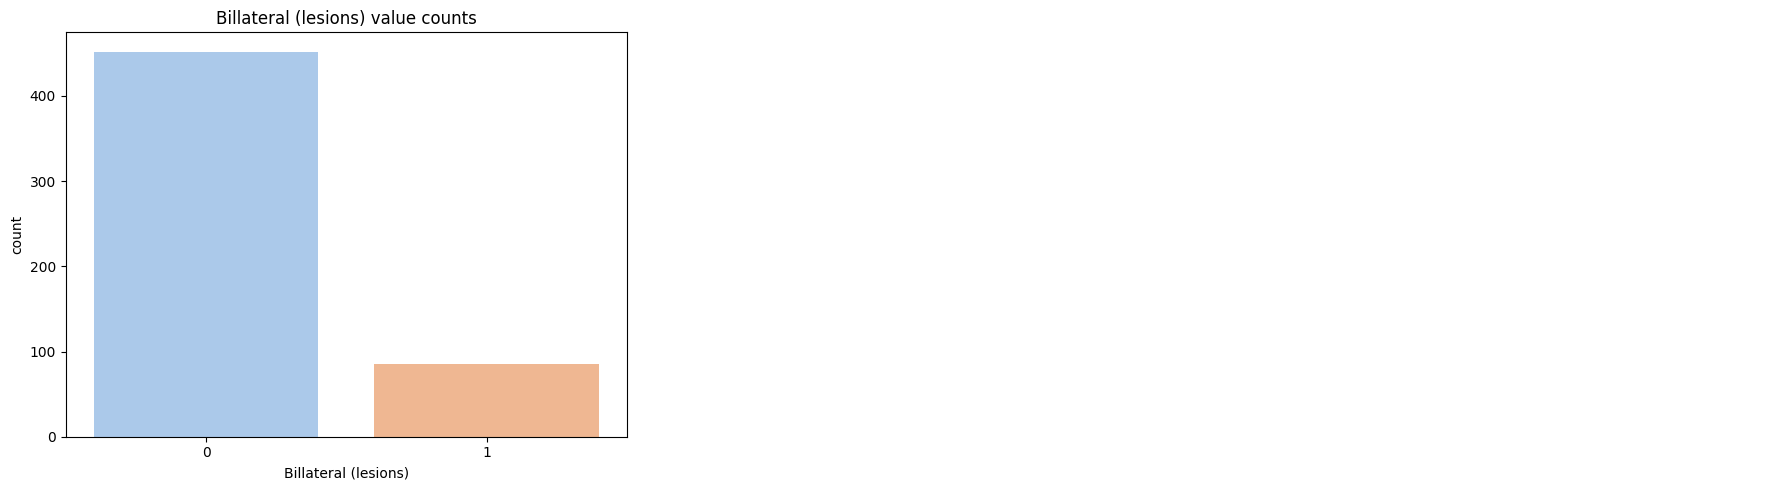

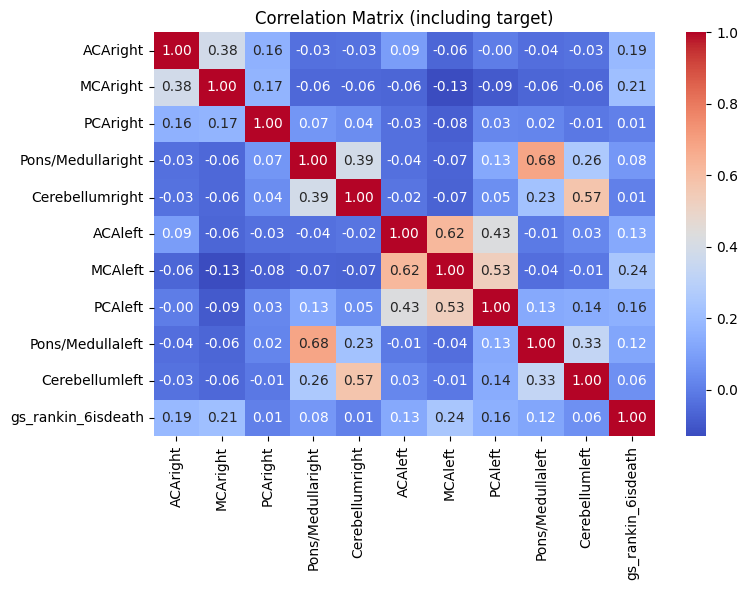


 Processing Group 3: Lesion Counts by Territory...



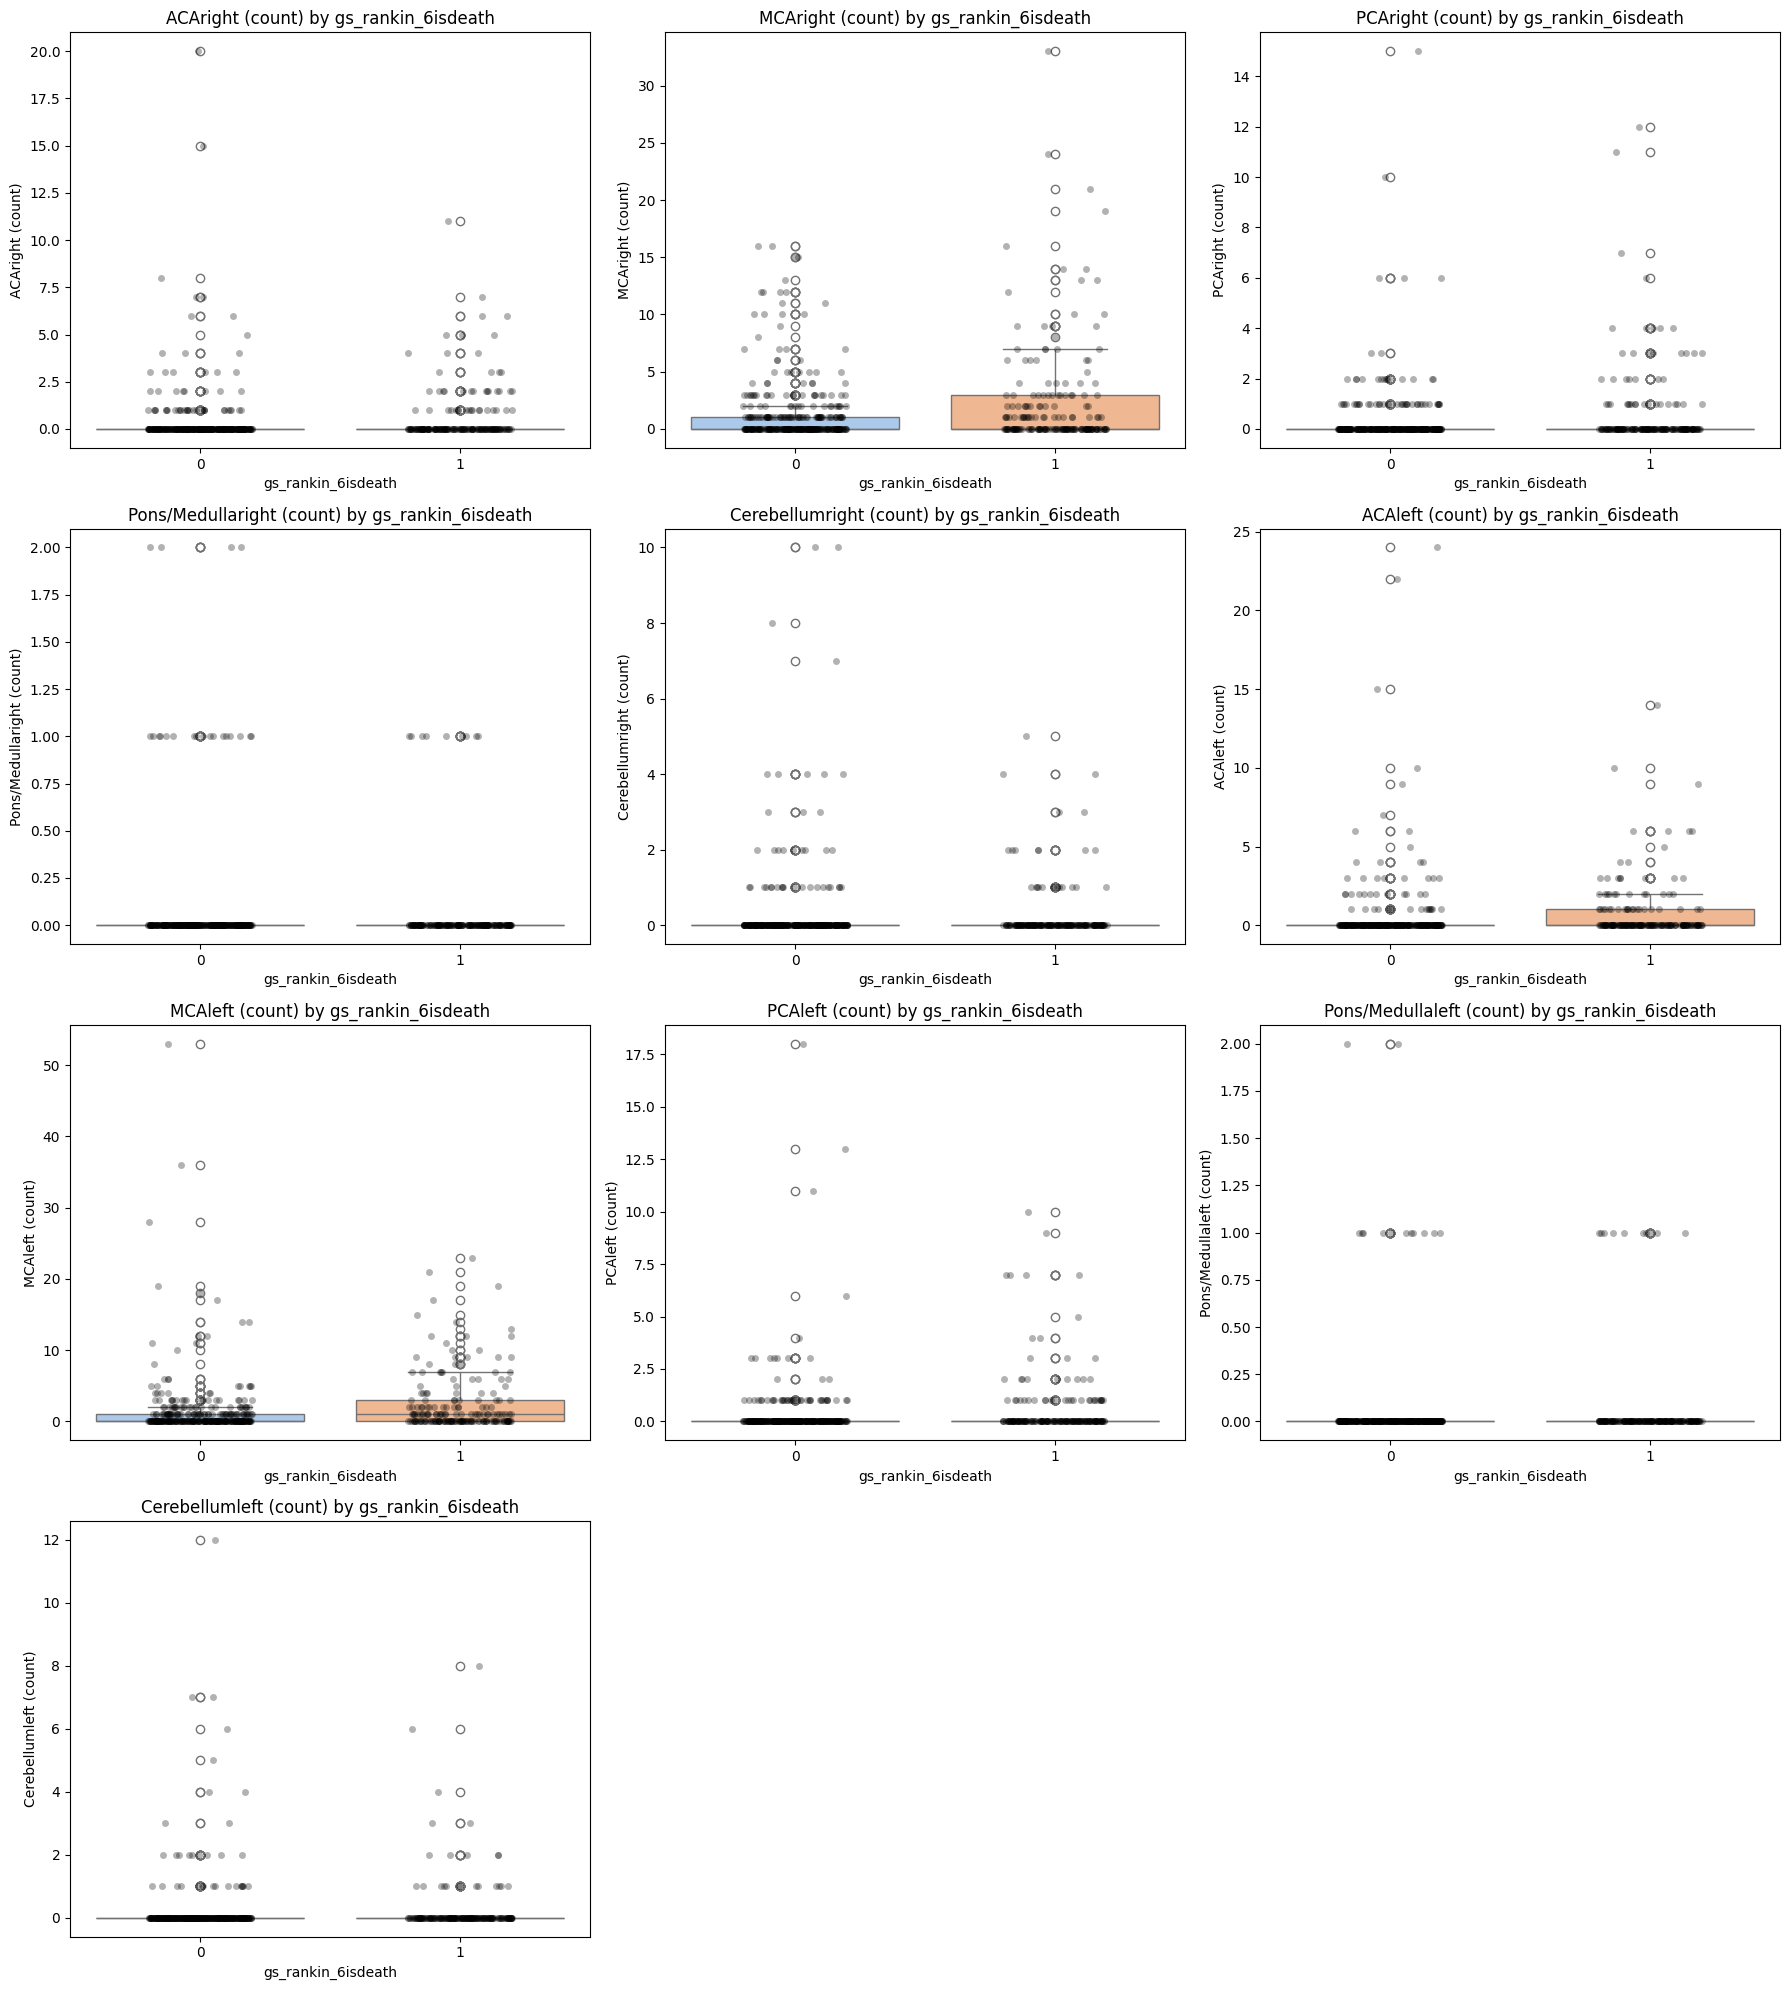

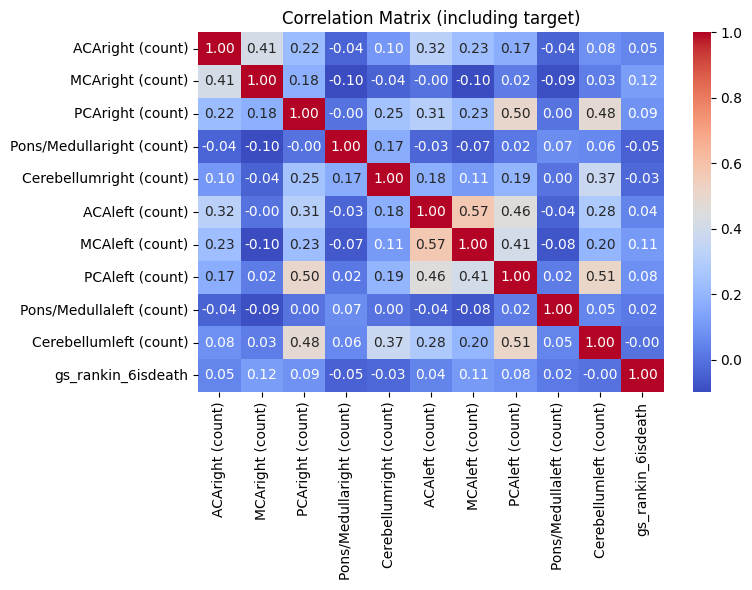


 Processing Group 4: Lesion Volumes by Label...



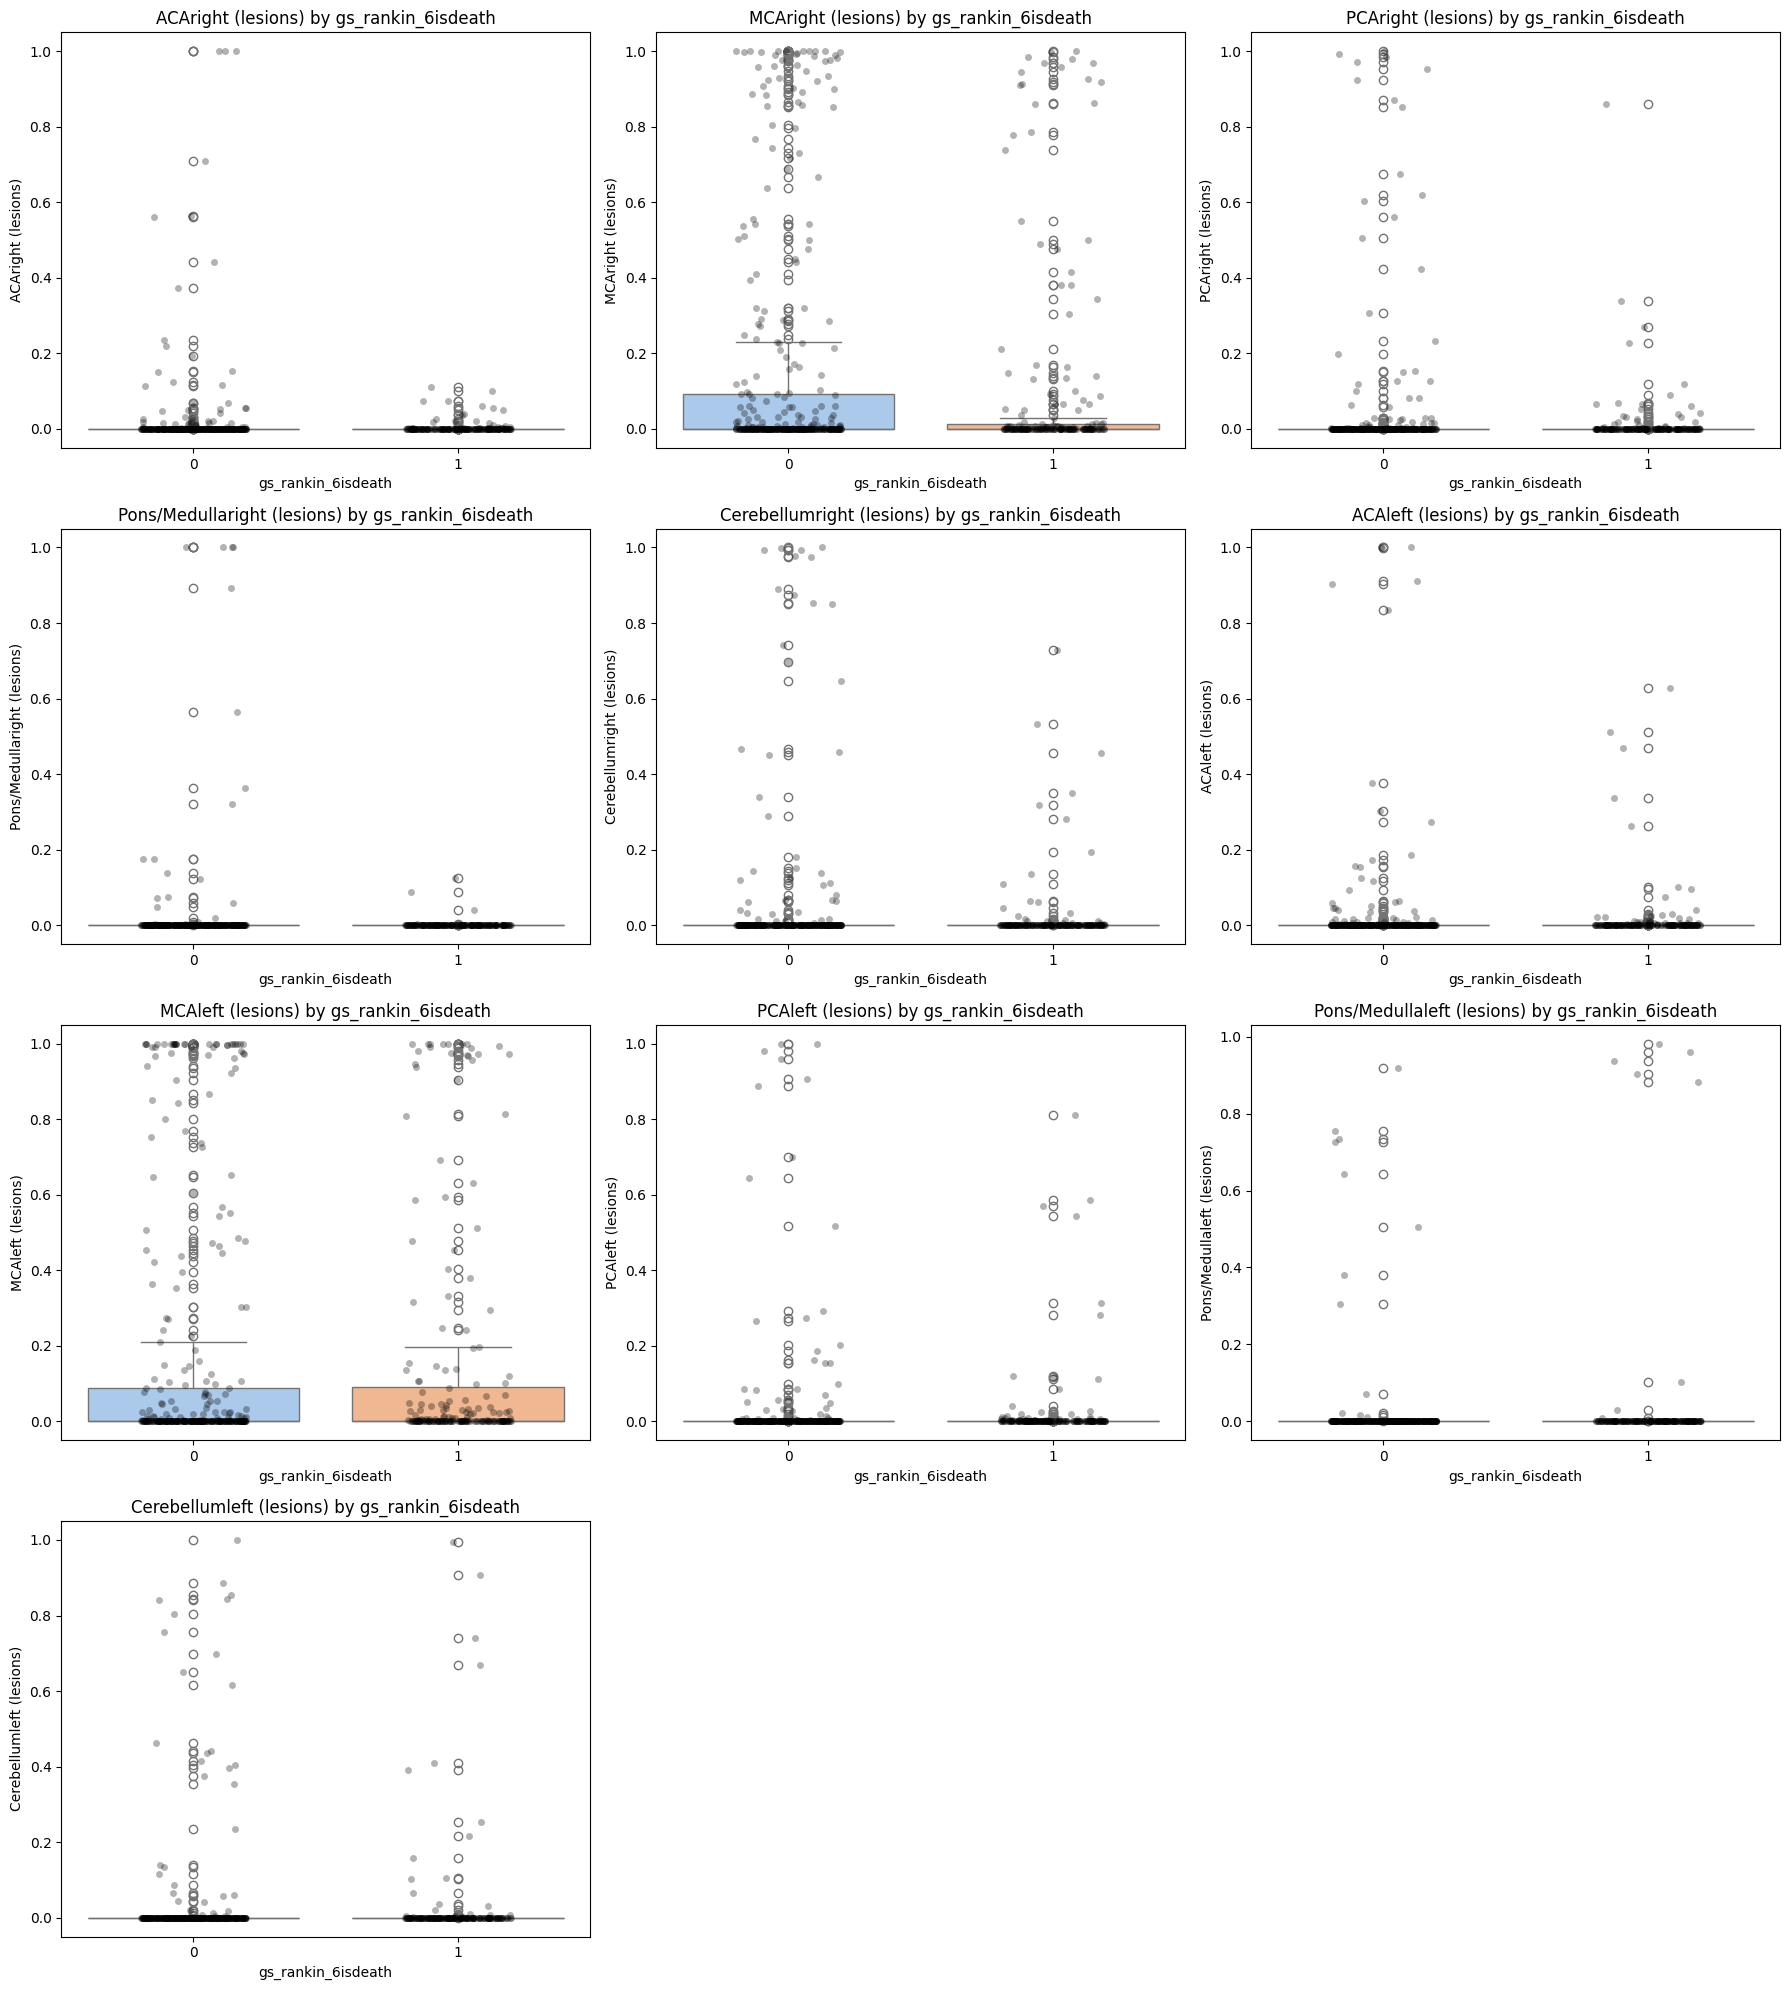

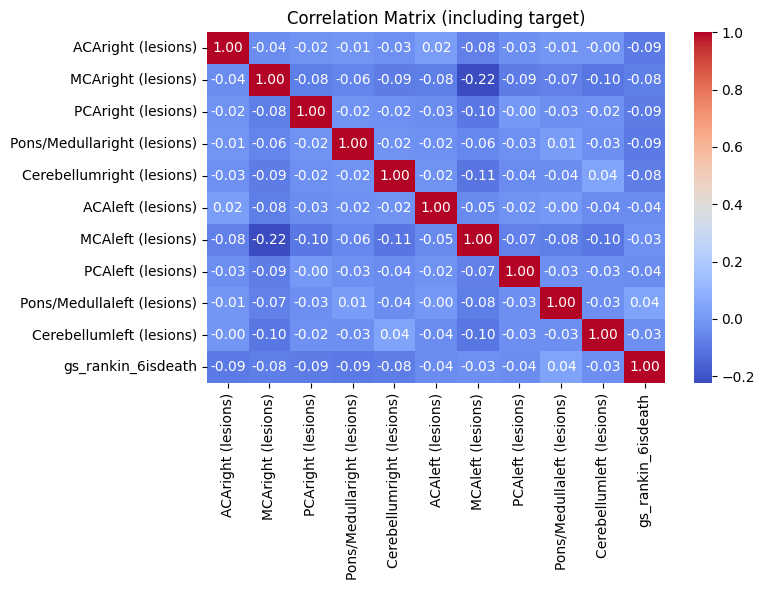


 Processing Group 5: Lesion Volume Proportions...



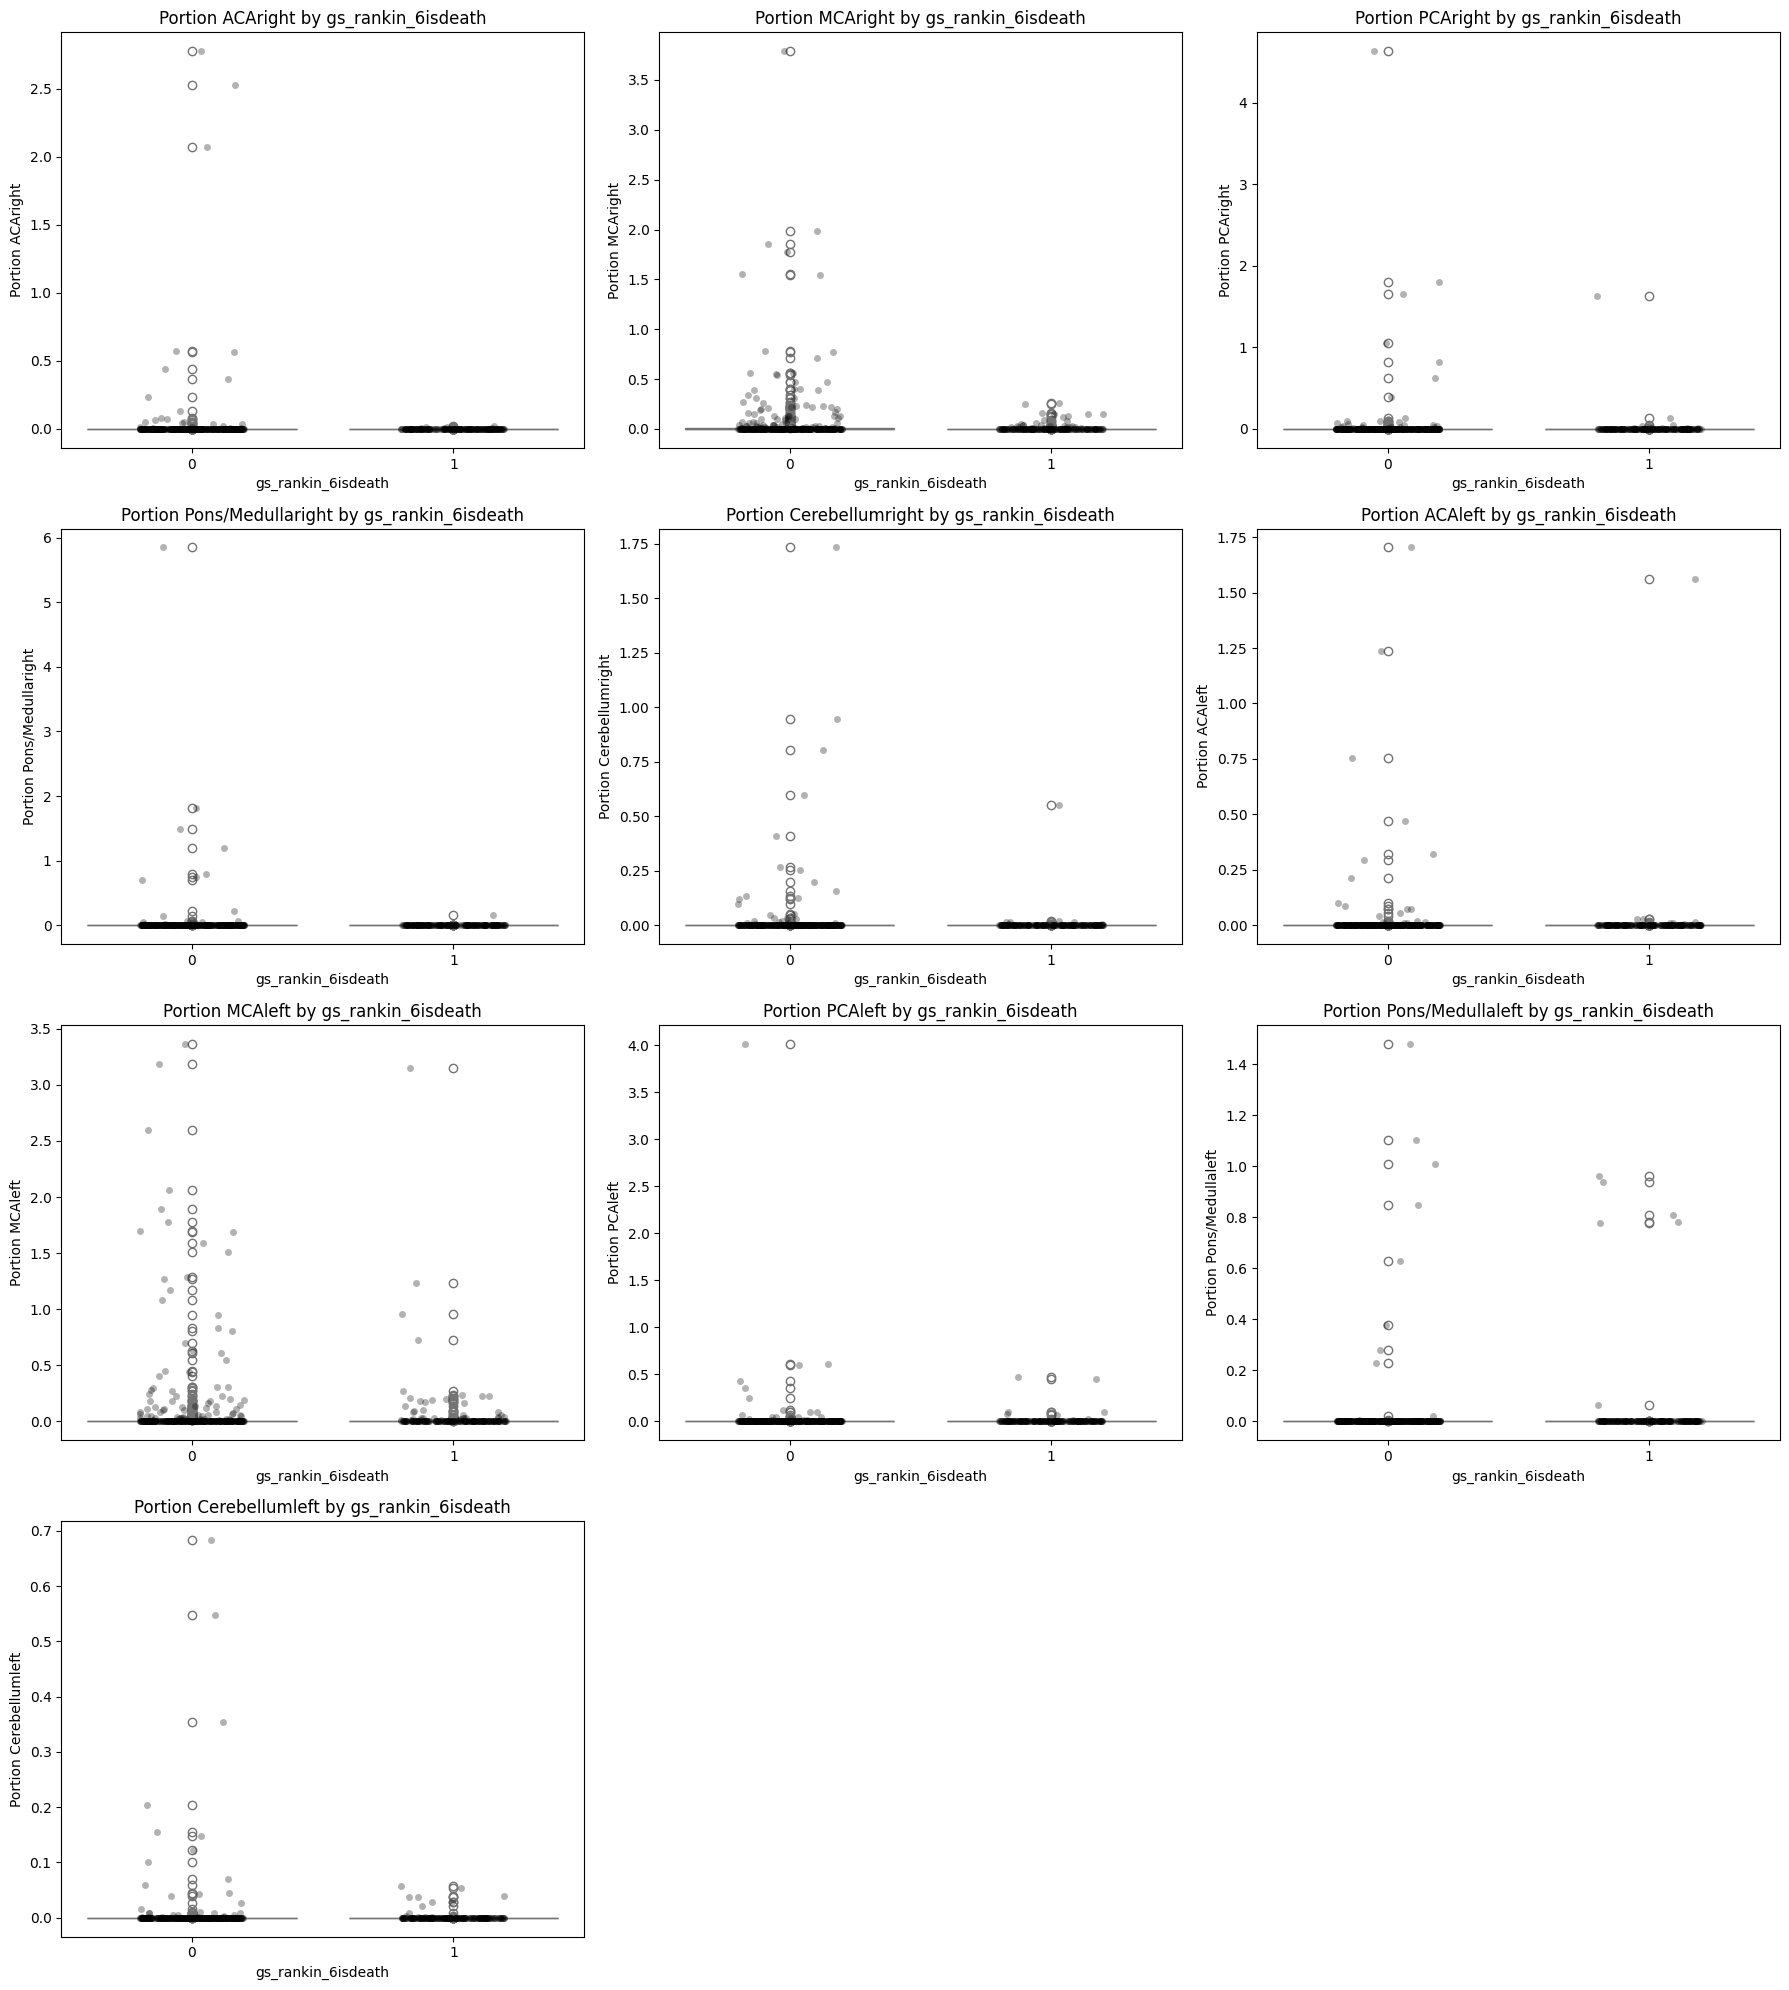

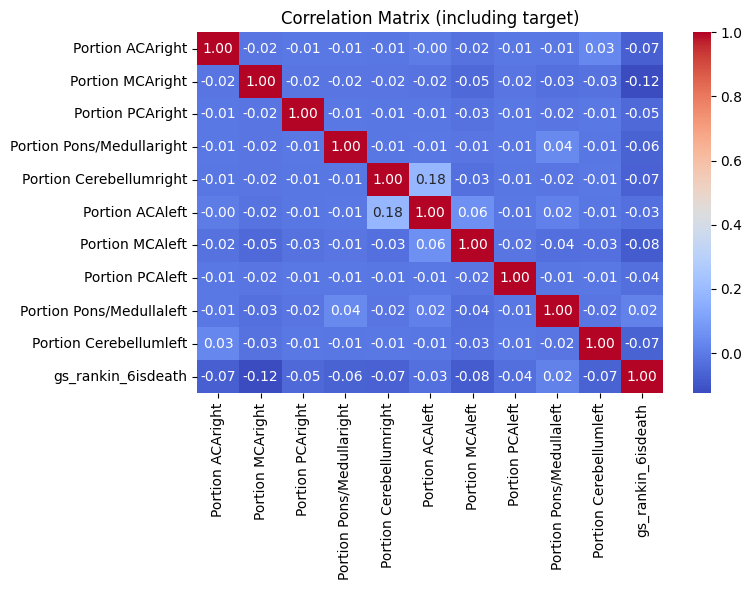


 Processing Group 6: Brain Region Volumes...



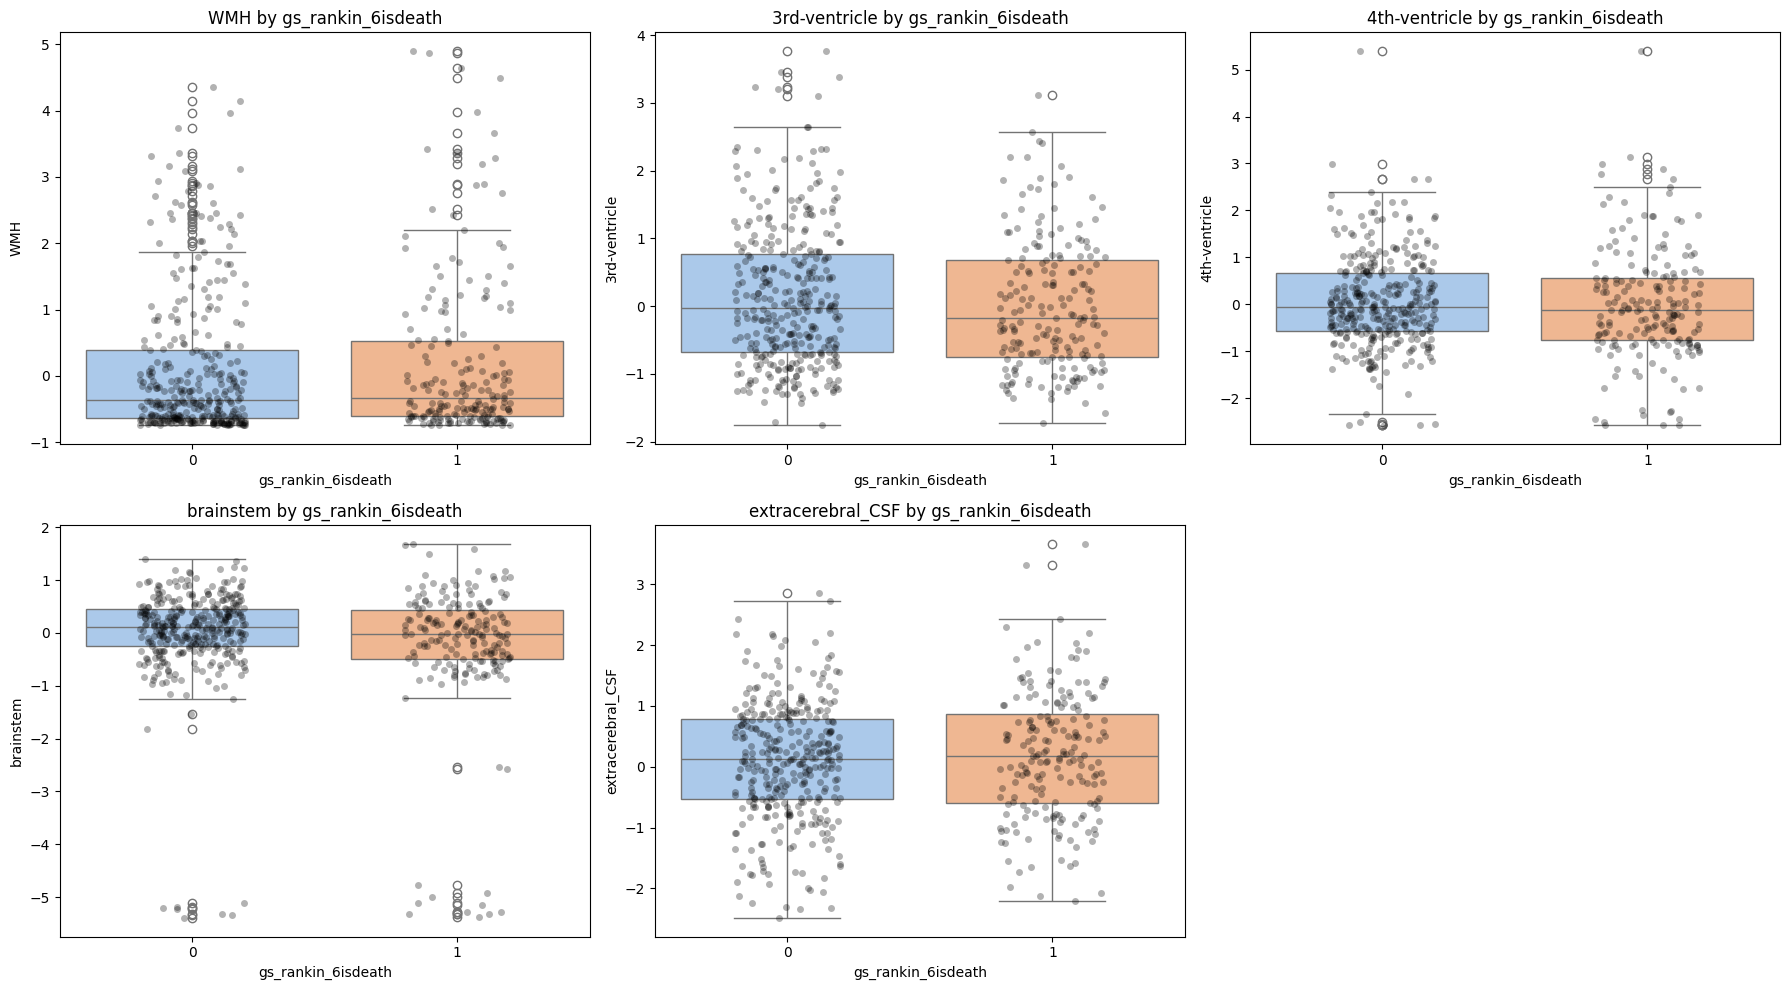

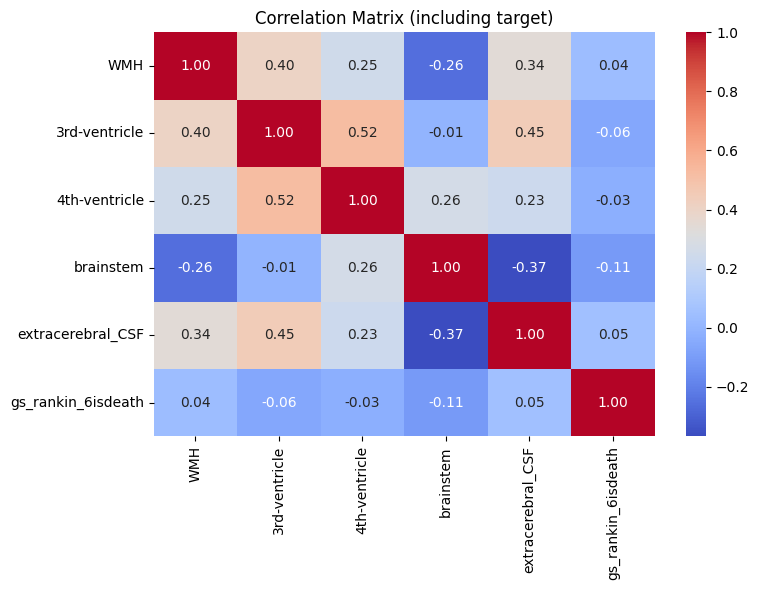


 Processing Group 7: Summed Volumes...



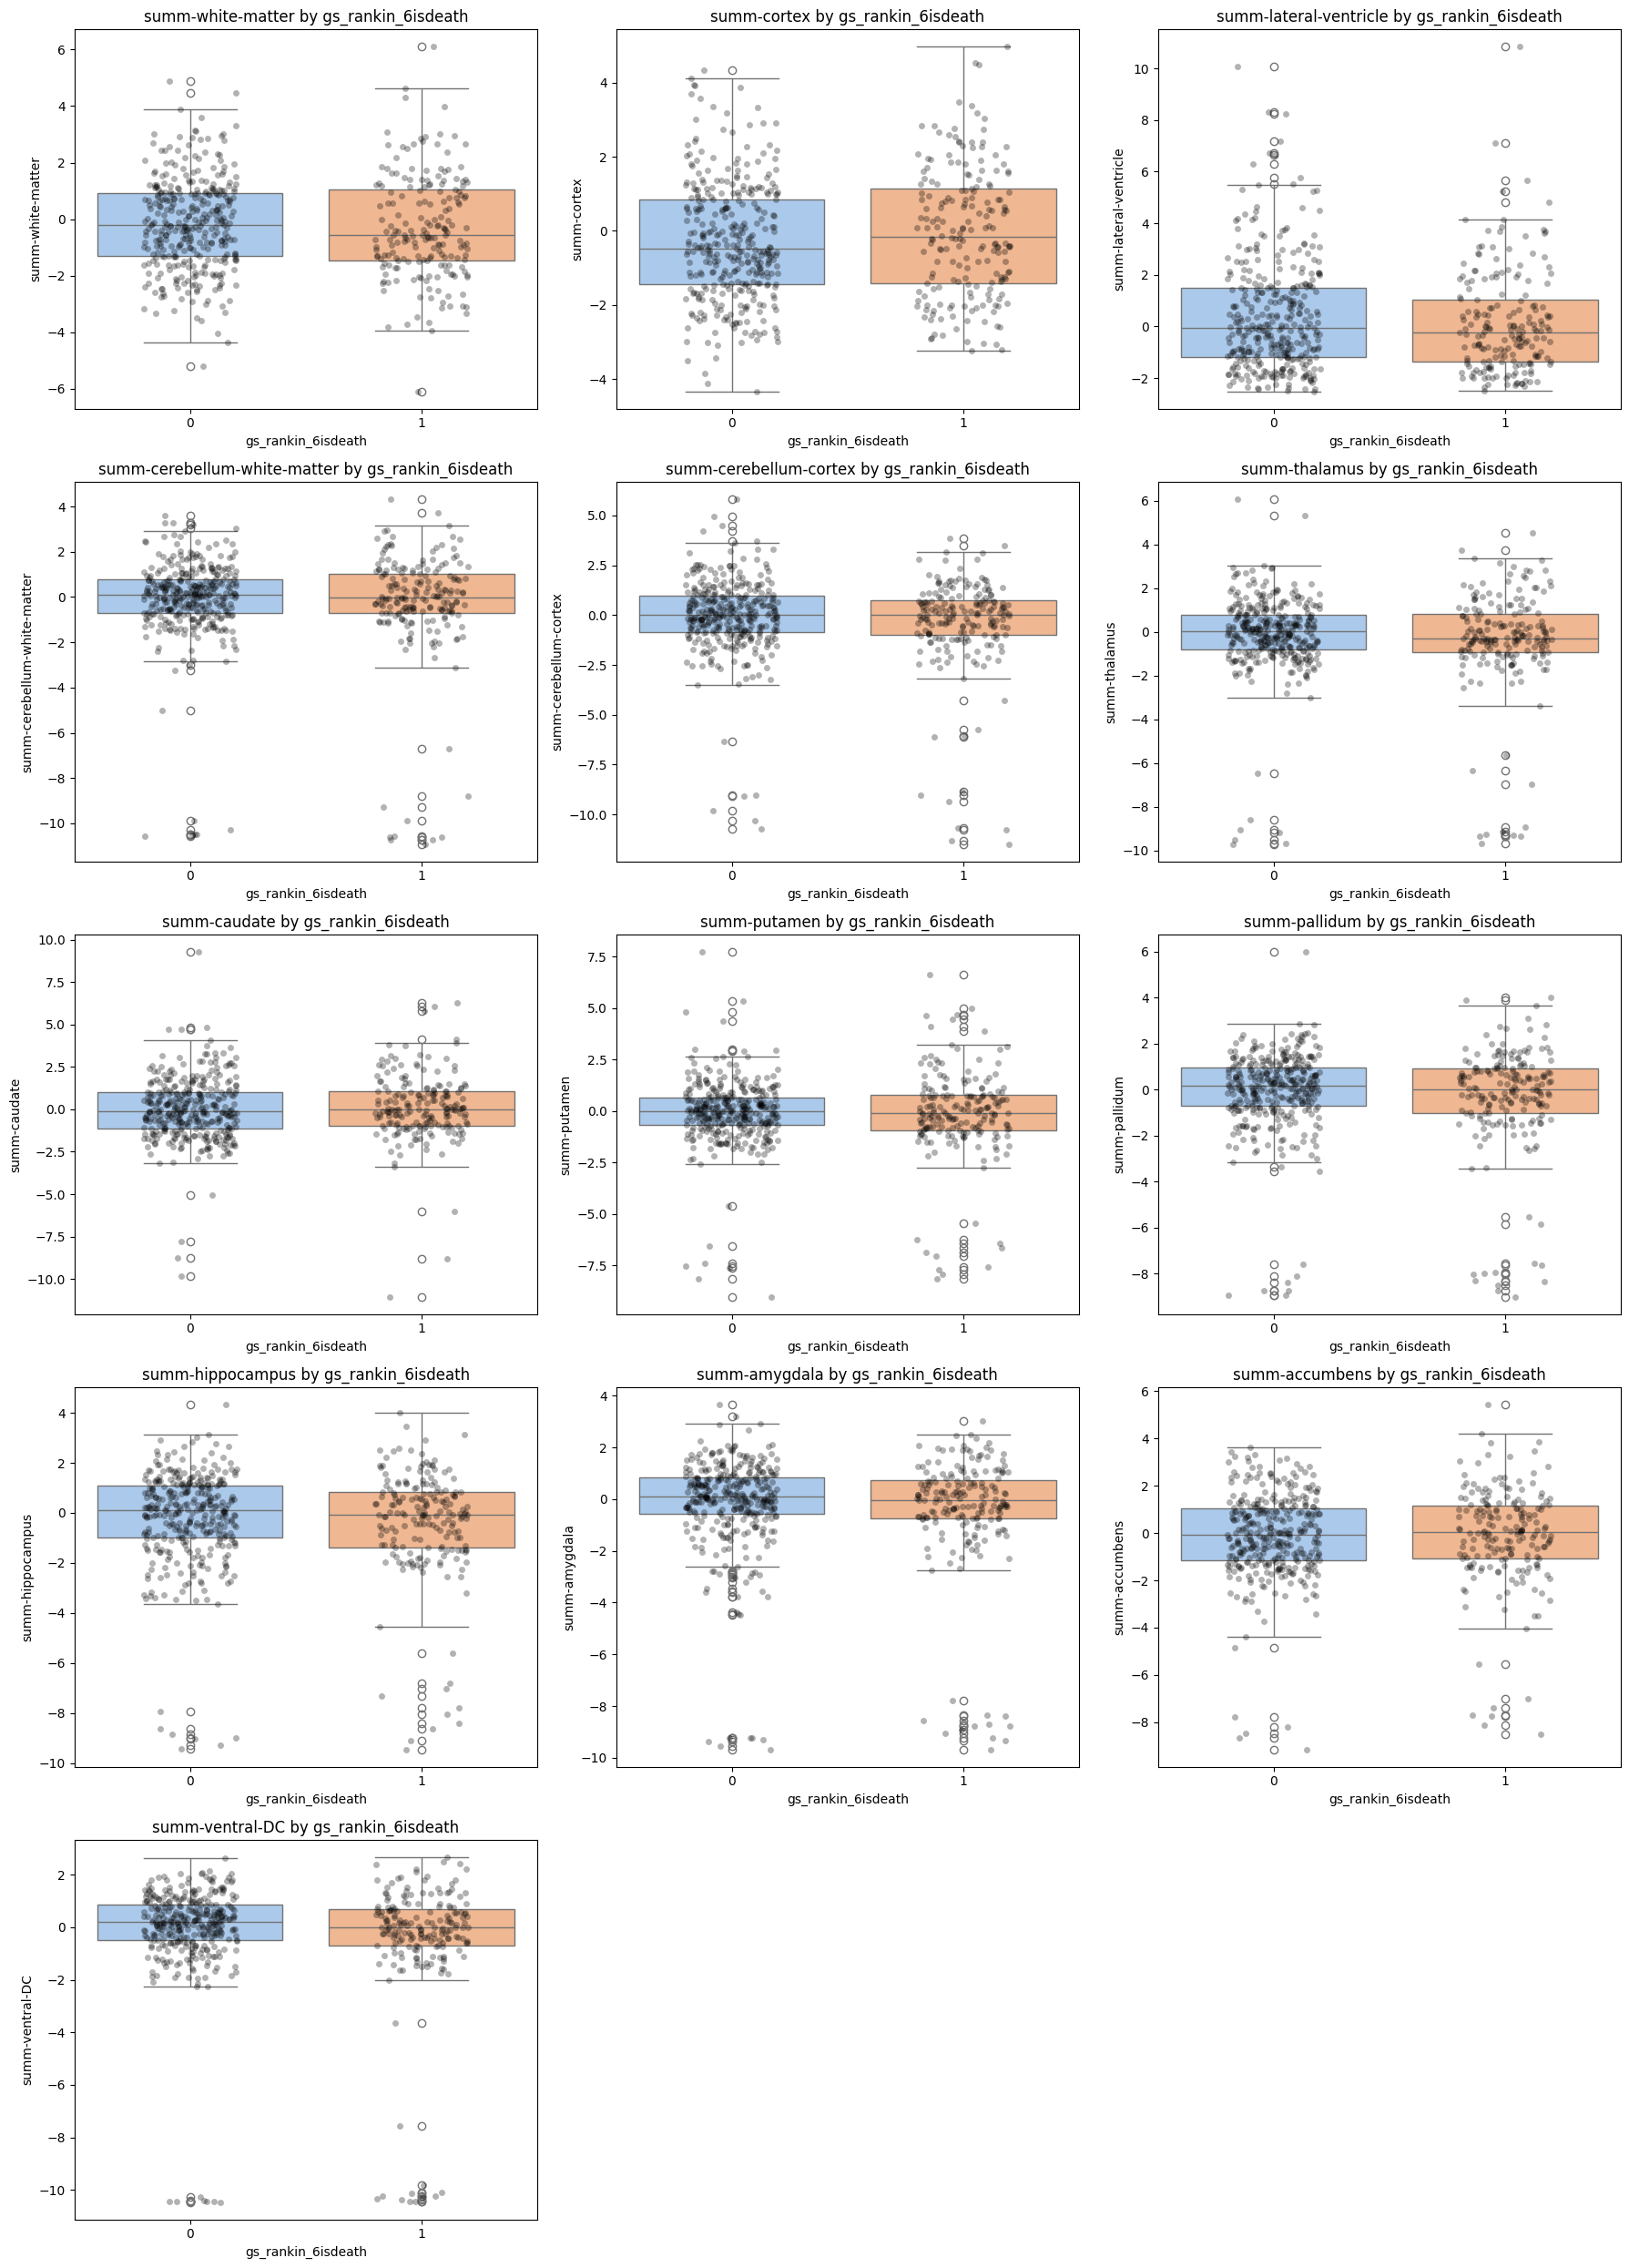

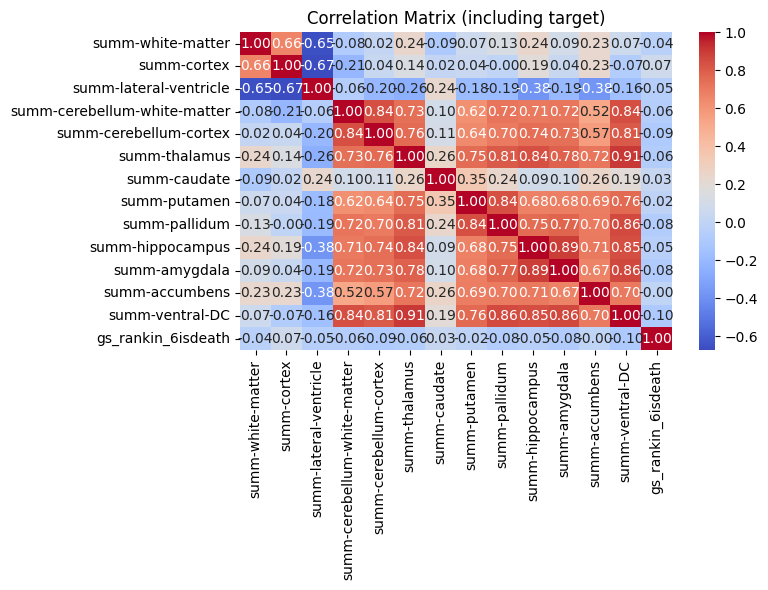

In [54]:
# Define all volumetric features groups

group_1_global_lesion_metrics = [
    'Total volume (direct)', 'Number of lesions', 'Portion largest lesion', 'MNI Volume', 'Main Side',
    'Totalleft', 'Totalright', 'ratio_sides', 'Billateral', 'Total_right (lesion)', 'Total_left (lesion)',
    'Total_anterior (lesion)', 'Total_posterior (lesion)', 'ratio_ant_post', 'ant_and_post_lesions'
]

group_2_lesion_volumes = [
    'ACAright', 'MCAright', 'PCAright', 'Pons/Medullaright', 'Cerebellumright',
    'ACAleft', 'MCAleft', 'PCAleft', 'Pons/Medullaleft', 'Cerebellumleft', 'Billateral (lesions)'
]

group_3_lesion_counts = [
    'ACAright (count)', 'MCAright (count)', 'PCAright (count)', 'Pons/Medullaright (count)', 'Cerebellumright (count)',
    'ACAleft (count)', 'MCAleft (count)', 'PCAleft (count)', 'Pons/Medullaleft (count)', 'Cerebellumleft (count)'
]

group_4_lesion_volumes_by_label = [
    'ACAright (lesions)', 'MCAright (lesions)', 'PCAright (lesions)', 'Pons/Medullaright (lesions)', 'Cerebellumright (lesions)',
    'ACAleft (lesions)', 'MCAleft (lesions)', 'PCAleft (lesions)', 'Pons/Medullaleft (lesions)', 'Cerebellumleft (lesions)'
]

group_5_lesion_proportions = [
    'Portion ACAright', 'Portion MCAright', 'Portion PCAright', 'Portion Pons/Medullaright', 'Portion Cerebellumright',
    'Portion ACAleft', 'Portion MCAleft', 'Portion PCAleft', 'Portion Pons/Medullaleft', 'Portion Cerebellumleft'
]

group_6_brain_region_volumes = ['WMH', '3rd-ventricle', '4th-ventricle', 'brainstem', 'extracerebral_CSF']


group_7_summed_volumes = ['summ-white-matter', 'summ-cortex', 'summ-lateral-ventricle', 'summ-cerebellum-white-matter',
    'summ-cerebellum-cortex', 'summ-thalamus', 'summ-caudate', 'summ-putamen',
    'summ-pallidum', 'summ-hippocampus', 'summ-amygdala', 'summ-accumbens', 'summ-ventral-DC'
]

# Store in dictionary
volumetric_feature_groups = {
    'Group 1: Global Lesion Metrics': group_1_global_lesion_metrics,
    'Group 2: Lesion Volumes by Vascular Territories': group_2_lesion_volumes,
    'Group 3: Lesion Counts by Territory': group_3_lesion_counts,
    'Group 4: Lesion Volumes by Label': group_4_lesion_volumes_by_label,
    'Group 5: Lesion Volume Proportions': group_5_lesion_proportions,
    'Group 6: Brain Region Volumes': group_6_brain_region_volumes,
    'Group 7: Summed Volumes': group_7_summed_volumes
}

# Run the plot function on each group
for group_name, features in volumetric_feature_groups.items():
    print(f"\n Processing {group_name}...\n")
    plot_features_vs_target(data, features, target='gs_rankin_6isdeath')


# Comments and observations:

- The Total Volume of the lesion is significantly higher in patients with a poor outcome (MRS 3-6)
- Lesion volumes per territory are not decisive 
- In groups 2, 3, 4, 5, 7 most features are not strongly correlated with the outcome, we're excluding them from our selected features for model training.

## Preparing Data for Machine Learning

In [55]:
# Splitting data into training and testing sets


X_full = data.drop(columns=['gs_rankin_6isdeath'])
y_full = data['gs_rankin_6isdeath']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)


In [56]:
from sklearn.feature_selection import mutual_info_classif
def prepare_features_for_mrmr(df, features, target):
    df = df[features + [target]].copy().dropna()

    discrete_mask = []
    for col in features:
        if df[col].dtype == 'object' or str(df[col].dtype).startswith('category'):
            df[col] = df[col].astype('category').cat.codes
            discrete_mask.append(True)
        else:
            discrete_mask.append(False)

    X = df[features].apply(pd.to_numeric, errors='coerce')
    y = df[target].astype(int).squeeze()

    return X, y, discrete_mask




X, y, discrete_mask = prepare_features_for_mrmr(data, features, target='gs_rankin_6isdeath')
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_mask)
mi_series = pd.Series(mi_scores, index=features).sort_values(ascending=False)


## Feature Selection

In [57]:
def run_mrmr(data, features, target, k=5):
    """
    Runs a simplified MRMR feature selection on a set of features.

    Parameters:
    - data: DataFrame
    - features: list of column names (features)
    - target: target variable name
    - k: number of features to select

    Returns:
    - DataFrame of top k features with MI and mean redundancy
    """
    df = data[features + [target]].dropna()

    # Encode categorical features if needed
    df = df.copy()
    # Convert both object and categorical dtypes
    for col in df.columns:
        if df[col].dtype == 'object' or str(df[col].dtype).startswith('category'):
            df[col] = df[col].astype('category').cat.codes


    X = df[features]
    y = df[target].astype(int)

    # Relevance: mutual information with target
    mi = mutual_info_classif(X, y, discrete_features='auto')
    mi_series = pd.Series(mi, index=features)

    # Redundancy: mean absolute correlation with other features
    corr_matrix = X.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    redundancy = corr_matrix.mean()

    # MRMR score: high relevance, low redundancy
    mrmr_score = mi_series - redundancy
    top_features = mrmr_score.sort_values(ascending=False).head(k)

    return pd.DataFrame({
        'Feature': top_features.index,
        'MRMR Score': top_features.values
    })


# Define your feature groups (reusing from earlier)
groups = {
    'Clinical Features': ['sex', 'age', 'bmi', 'nihss', 'etiology', 'priorstroke'],
    'Group 1: Global Lesion Metrics': group_1_global_lesion_metrics,
    'Group 2: Lesion Volumes': group_2_lesion_volumes,
    'Group 3: Lesion Counts': group_3_lesion_counts,
    'Group 4: Lesion Volumes by Label': group_4_lesion_volumes_by_label,
    'Group 5: Lesion Volume Proportions': group_5_lesion_proportions,
    'Group 6: Brain Region Volumes': group_6_brain_region_volumes,
    'Group 7: Summed Volumes': group_7_summed_volumes
}

# Run MRMR on each group
mrmr_results = {}

for group_name, feature_list in groups.items():
    print(f"\n MRMR Feature Selection for {group_name}")
    top_feats = run_mrmr(data, feature_list, target='gs_rankin_6isdeath', k=5)
    print(top_feats)
    mrmr_results[group_name] = top_feats


 MRMR Feature Selection for Clinical Features
       Feature  MRMR Score
0        nihss    0.044115
1          bmi   -0.003322
2  priorstroke   -0.015660
3          age   -0.040354
4     etiology   -0.055574

 MRMR Feature Selection for Group 1: Global Lesion Metrics
                    Feature  MRMR Score
0  Total_posterior (lesion)   -0.072635
1         Number of lesions   -0.109420
2                 Main Side   -0.137088
3            ratio_ant_post   -0.144919
4    Portion largest lesion   -0.146450

 MRMR Feature Selection for Group 2: Lesion Volumes
                Feature  MRMR Score
0  Billateral (lesions)   -0.062774
1              ACAright   -0.066594
2              MCAright   -0.070314
3              PCAright   -0.071514
4               PCAleft   -0.095466

 MRMR Feature Selection for Group 3: Lesion Counts
                     Feature  MRMR Score
0  Pons/Medullaright (count)   -0.012836
1   Pons/Medullaleft (count)   -0.037093
2           MCAright (count)   -0.092833
3    C

In [58]:
# Let's make our final selection of features

# Features selected from MRMR
selected_features = []

for group_name, df in mrmr_results.items():
    top_feats = df['Feature'].tolist()
    selected_features.extend(top_feats)
print(f"\nSelected Features from MRMR: {selected_features}")

# Features selected based on domain knowledge 
selected_features = clinical_features + group_1_global_lesion_metrics + group_6_brain_region_volumes
selected_features.remove('gs_rankin_6isdeath')
print(f"\nSelected Features based on domain knowledge: {selected_features}")

# Redefine X_train and X_test with the selected features
X_train = X_train_full[selected_features]
X_test = X_test[selected_features]
y_train = y_train_full
y_test = y_test


Selected Features from MRMR: ['nihss', 'bmi', 'priorstroke', 'age', 'etiology', 'Total_posterior (lesion)', 'Number of lesions', 'Main Side', 'ratio_ant_post', 'Portion largest lesion', 'Billateral (lesions)', 'ACAright', 'MCAright', 'PCAright', 'PCAleft', 'Pons/Medullaright (count)', 'Pons/Medullaleft (count)', 'MCAright (count)', 'Cerebellumright (count)', 'ACAright (count)', 'ACAleft (lesions)', 'Pons/Medullaleft (lesions)', 'ACAright (lesions)', 'Pons/Medullaright (lesions)', 'Cerebellumleft (lesions)', 'Portion ACAright', 'Portion Pons/Medullaright', 'Portion MCAright', 'Portion PCAleft', 'Portion PCAright', 'brainstem', 'WMH', '4th-ventricle', 'extracerebral_CSF', '3rd-ventricle', 'summ-caudate', 'summ-cortex', 'summ-white-matter', 'summ-lateral-ventricle', 'summ-cerebellum-cortex']

Selected Features based on domain knowledge: ['sex', 'age', 'bmi', 'nihss', 'acuteischaemicstroke', 'priorstroke', 'etiology', 'Total volume (direct)', 'Number of lesions', 'Portion largest lesion',

## Model Training & Evaluation

### Logistic Regression


Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC: 0.7581039659265466
Accuracy: 0.6388888888888888
Precision: 0.5
Recall (Sensitivity): 0.5897435897435898
F1 Score: 0.5411764705882353
ROC AUC: 0.7131178000743218
[[46 23]
 [16 23]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        69
           1       0.50      0.59      0.54        39

    accuracy                           0.64       108
   macro avg       0.62      0.63      0.62       108
weighted avg       0.65      0.64      0.64       108



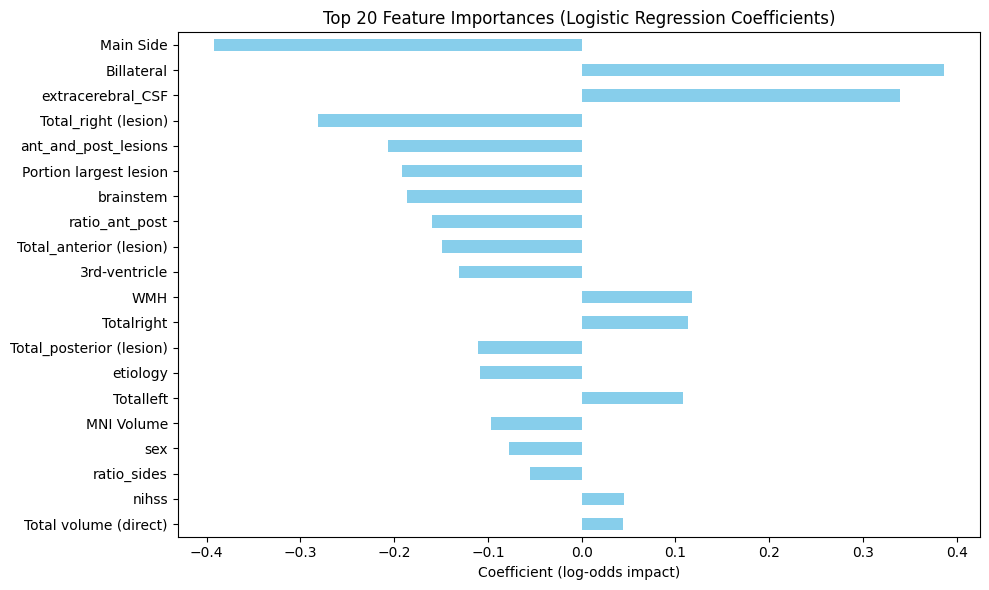

In [59]:
# Logistic Regression

# WARNING : logistic regression only accepts numeric values
# Encode any remaining categorical features as numeric codes
for col in X_train.columns:
    if X_train[col].dtype == 'object' or str(X_train[col].dtype).startswith('category'):
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preparing the Grid Search for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports both l1 and l2
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(max_iter=200)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)

best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)      
y_proba = best_lr.predict_proba(X_test)[:, 1] 


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get feature importance as absolute values of coefficients
coefs = pd.Series(best_lr.coef_[0], index=X_train.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
coefs_sorted.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient (log-odds impact)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Random Forest

In [60]:
# 🌳 Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Results:
[[54 15]
 [19 20]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        69
           1       0.57      0.51      0.54        39

    accuracy                           0.69       108
   macro avg       0.66      0.65      0.65       108
weighted avg       0.68      0.69      0.68       108

ROC AUC: 0.7445187662578967


### SVM

We built an SVM classifier using the non‐linear RBF kernel and optimizes its hyperparameters using a randomized search. Because the RBF kernel does not yield direct coefficients like linear models, we estimated feature importance using permutation importance. This permutation importance method shuffles feature values and records the drop in performance (measured by ROC AUC) to determine each feature’s contribution. Thus, the model’s performance (ROC AUC) decreases when the values of a particular feature are randomly shuffled. A larger decrease indicates the model relies heavily on that feature to make accurate predictions. 

Best parameters: {'C': np.float64(0.08787658410143283), 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best ROC AUC: 0.7527308336824465
Accuracy: 0.6203703703703703
Precision: 0.48
Recall (Sensitivity): 0.6153846153846154
F1 Score: 0.5393258426966292
ROC AUC: 0.713489409141583
Confusion Matrix:
 [[43 26]
 [15 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68        69
           1       0.48      0.62      0.54        39

    accuracy                           0.62       108
   macro avg       0.61      0.62      0.61       108
weighted avg       0.65      0.62      0.63       108



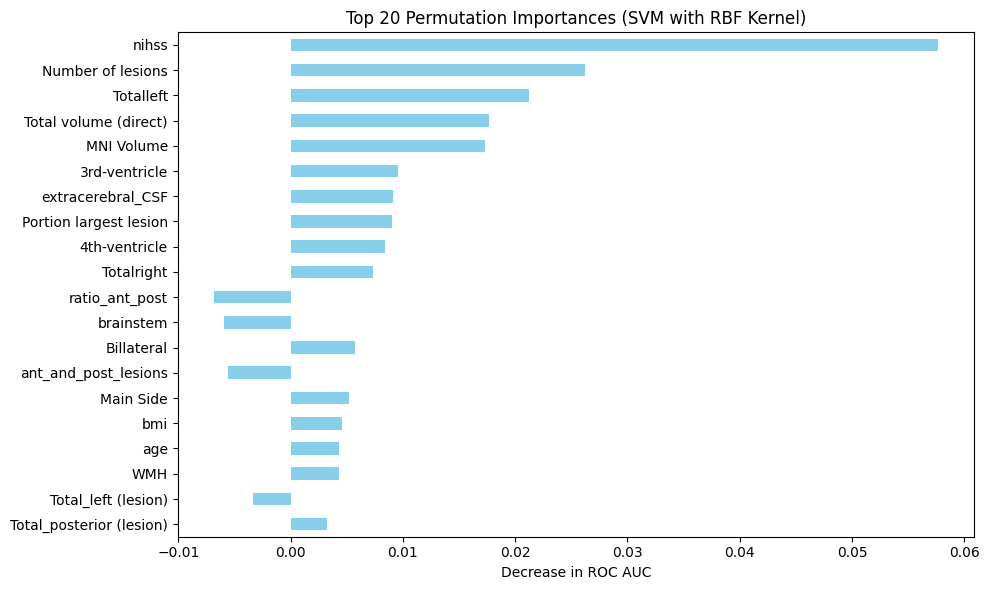

In [ ]:
# 🌀 Optimized SVM with Permutation Importance for Feature Visualization

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import uniform

# Define a reduced parameter space using random distributions where applicable
param_distributions = {
    'C': uniform(0.01, 100),   
    'kernel': ['rbf'],         # Focusing on the RBF kernel to reduce search space and computation
    'gamma': ['scale'],        # Using 'scale' which automatically adjusts gamma based on data
    'class_weight': [None, 'balanced']
}

# Initialize the SVM classifier with probability=True for ROC AUC estimation:
svm = SVC(probability=True)

# Use RandomizedSearchCV to evaluate a random sample of hyperparameter combinations.
rand_search = RandomizedSearchCV(svm, param_distributions,
                                 n_iter=100,       # I had to reduce the number of iterations to speed up the process
                                 cv=5,            # 
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 random_state=42)


rand_search.fit(X_train_scaled, y_train)

print("Best parameters:", rand_search.best_params_)
print("Best ROC AUC:", rand_search.best_score_)

# Retrieve the best SVM estimator and make predictions on the scaled test data:
best_svm = rand_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# - Evaluation Metrics - 
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


# For kernels like 'rbf' that do not expose coefficients, we use permutation importance.
# Compute permutation importance on the test set:
result = permutation_importance(best_svm, X_test_scaled, y_test, 
                                scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
importances = pd.Series(result.importances_mean, index=X_train.columns)
importances_sorted = importances.sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Permutation Importances (SVM with RBF Kernel)')
plt.xlabel('Decrease in ROC AUC')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Permutation Importance reveals us that acute stroke severity (NIHSS), overall lesion burden (number of lesions, total volume), and critical anatomical involvement (brainstem, bilateral, anterior/posterior) are the strongest predictors for your outcome metric.
Demographic and morphological factors (age, BMI, WMH, CSF volumes) still contribute meaningfully, though less than the top few features.

## Results & Discussion


## References

1. Absher et al., "The Stroke Outcome Optimization Project: Acute Ischemic 
Strokes from a Comprehensive Stroke Center," Scientific Data, 2024. 
(SOOP Dataset: https://doi.org/10.1038/s41597-024-03667-5) 
2. Isensee F, Schell M, Pflueger I, Brugnara G, Bonekamp D, Neuberger U, Wick 
A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, 
Kickingereder P. Automated brain extraction of multisequence MRI using 
artificial neural networks. Hum Brain Mapp. 2019 Dec 1;40(17):4952-4964. doi: 
10.1002/hbm.24750. Epub 2019 Aug 12. PMID: 31403237; PMCID: PMC6865732. 
3. Quantifying white matter hyperintensity and brain volumes in heaterogeneous 
clinical and low.field protable MRI. Laso P, Cerri S, Sorby-Adams A, Guo J, 
Matteen F, Goebl P, Wu J, Liu P, Li H, Young SI, Billot B, Puonti O, Sze G, 
Payabavash S, DeHavenon A, Sheth KN, Rosen MS, Kirsch J, Strisciuglio N, 
Wolterink JM, Eshaghi A, Barkhof F, Kimberly WT, and Iglesias JE. Proceedings of 
ISBI 2024 
4. A. C. Evans and D. L. Collins and S. R. Mills and E. D. Brown and R. L. Kelly and 
T. M. Peters, "3D statistical neuroanatomical models from 305 MRI volumes", 
Proc. IEEE-Nuclear Science Symposium and Medical Imaging Conference, 1813
1817, 1993. 
5. Schirmer, Markus D., et al. "Spatial signature of white matter hyperintensities 
in stroke patients." Frontiers in neurology 10 (2019): 208. 
6. Griethuysen, J. J. M., Fedorov, A., Parmar, C., Hosny, A., Aucoin, N., Narayan, 
V., Beets-Tan, R. G. H., Fillon-Robin, J. C., Pieper, S., Aerts, H. J. W. L. (2017). 
Computational Radiomics System to Decode the Radiographic Phenotype. 
Cancer Research, 77(21), e104–e107. `https://doi.org/10.1158/0008-5472.CAN
17-0339 <https://doi.org/10.1158/0008-5472.CAN-17-0339>`_ 
7. Jiang L, Miao Z, Chen H, Geng W, Yong W, Chen YC, Zhang H, Duan S, Yin X, 
Zhang Z. Radiomics Analysis of Diffusion-Weighted Imaging and Long-Term 
Unfavorable Outcomes Risk for Acute Stroke. Stroke. 2023 Feb;54(2):488-498. 
doi: 10.1161/STROKEAHA.122.040418. Epub 2022 Dec 6. PMID: 36472198. 
8. Quantifying white matter hyperintensity and brain volumes in heaterogeneous 
clinical and low.field protable MRI. Laso P, Cerri S, Sorby-Adams A, Guo J, 
Matteen F, Goebl P, Wu J, Liu P, Li H, Young SI, Billot B, Puonti O, Sze G, 
Payabavash S, DeHavenon A, Sheth KN, Rosen MS, Kirsch J, Strisciuglio N, 
Wolterink JM, Eshaghi A, Barkhof F, Kimberly WT, and Iglesias JE. Proceedings of 
ISBI 2024 
9. Hollmann, N., Müller, S., Purucker, L. et al. Accurate predictions on small data 
with a tabular foundation model. Nature 637, 319–326 (2025). 
https://doi.org/10.1038/s41586-024-08328-6
